In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import xlrd
import statsmodels.formula.api as smf
import scipy as sp
import sklearn
from sklearn import linear_model

# 1. 분석의 개요 및 목적
 
 * Toyota Corolla 중고차에 대한 data set을 분석하여 실제 시장가격을 예측하는 회귀모델을 찾는다.
 
 
 * 모토: "배운 것을 최대한 다 써먹자!",  "팀플은 팀플답게."
 

# 2. 분석의 방법 및 범위


##  * 다중 회귀 분석(Multiple Linear Regression Analysis) 
 
###  ** 다중 회귀 분석의 Workflow 설정.

#### 참고자료) 이부일 강사님, 박재근 매니저님, 변영효 강사님, 조용래 강사님의 수업자료.

###### (1)  EDA(탐색적 자료 분석)

* 변수 탐색 및 데이터의 이해.

- 1단계: 도메인 지식 확보 및 변수별 정의.
- 2단계: 산점도 확인. 
- 3단계: 변수 별 상관관계도 확인.

###### (2) Preprocessing(전처리)

* 데이터 중복 제거.
* 변수 스케일링.
* 아웃라이어 탐색.

###### (3) Model Selection(회귀 모델 설정)

* 다중 회귀 분석 후 변수 최종 선택 및 모델 설정.
* 크로스 밸리데이션.
* 회귀 모델군 상호 평가.


## (1) EDA.
### 1단계: 도메인 지식 확보 및 변수별 정의.

### * 주어진  data set.

* TRAIN set 한 질(id:1019개)
* Price Column이 빠진 TEST set 한 질(id: 418개)
* 총 1537대 차량데이터와 39개의 변수들.


### * 변수 별 정의.

* Record_ID	: id
* Model Description	: 모델
* Offer Price in EUROs : 가격
* Age in months as in August 2004	: 2004 년 8 월 까지 개월 수(연식)
* Manufacturing month (1-12)	: 제조월
* Manufacturing Year  : 제조 년도
* Accumulated Kilometers on odometer : 주행거리
* Fuel Type (Petrol, Diesel, CNG) : 연료유형  (오일, 디젤, CNG)
* Horse Power : 마력
* Metallic Color?  (Yes=1, No=0) : 메탈릭컬러 (예 = 1, 아니오 = 0)
* Color (Blue, Red, Grey, Silver, Black, etc.) : 차 색깔
* Automatic ( (Yes=1, No=0) : 자동 (yes = 자동 , no='수동)
* Cylinder Volume in cubic centimeters : 입방 cm 단위 실린더 크기
* Number of doors : 문 개수
* Number of cylinders : 실린더 개수
* Number of gear positions : 기어 단계 수
* Quarterly road tax in EUROs : 환경부담금
* Weight in Kilograms : Kg 단위 중량
* Within Manufacturer's Guarantee period  (Yes=1, No=0)	; 제조사 보증기간 이내
* BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)	: BOVAG 보증 
* Guarantee period in months : 월 단위 보증 기간
* Anti-Lock Brake System (Yes=1, No=0)	: 특수 제동 장치 - 
* Driver_Airbag  (Yes=1, No=0) : 운전석 에어백
* Passenger Airbag  (Yes=1, No=0) : 보조석 에어백
* Airconditioning  (Yes=1, No=0) : 에어컨
* Automatic Airconditioning  (Yes=1, No=0) : 자동 에어컨디셔닝 장치 유무
* Boardcomputer  (Yes=1, No=0) : 기판 컴퓨터 유무
* CD Player  (Yes=1, No=0) : cd플레이어 유무
* Central Lock  (Yes=1, No=0) : 주행중에 자동차 문이 자동으로 잠기는 장치 유무
* Powered Windows  (Yes=1, No=0) : 자동 창문 개폐창 유무
* Power Steering  (Yes=1, No=0)	 : 동력조향장치 유무(핸들 조작을 쉽게 해줌)
* Radio  (Yes=1, No=0) : 카라디오 유무
* Mistlamps  (Yes=1, No=0)	: 자동차 안개등 유무
* Sport Model  (Yes=1, No=0) : 스포츠카인지 아닌지(확인요망)
* Backseat Divider  (Yes=1, No=0) : 등받이 분배기 유무
* Metallic Rim  (Yes=1, No=0) : 메탈릭 림 유무
* Radio Cassette  (Yes=1, No=0)	 : 라디오 카세트 유무
* Parking assistance system  (Yes=1, No=0) : 주차 보조 시스템 유무
* Tow Bar  (Yes=1, No=0) : 견인바 유무


### * 양적 변수와 질적 변수 나누기

In [2]:
# train set 호출

df01 = pd.read_csv("train.csv")
df01.tail(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,1,0,0,0,0,0,0,0,0


### 양적변수와 질적 변수를 구분함.

In [3]:
cols_real = ['Id', 'Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 'Doors', 
             'Quarterly_Tax', 'Weight', 'Guarantee_Period','Price', 'Cylinders']

print len(cols_real) 


cols_cat = ['Model', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer','Price', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

print len(cols_cat)


# 양적변수 12개와 질적변수 27개로 구분됨.

12
27


## 1) 도메인 지식 확보.

### - 6/9(금)에 장한평에 있는 중고차매매업체인 'U-삼진랜드'를 방문함.

* 업체 대표이신 성중기 사장님에게서 30분 간 중고차 가격을 결정하는 요인에 대해 강의를 들었음. 

### - 강의 내용 요약.

1) 자동차 가격을 결정하는 Big 4 요소

* 사고 유무, KM - 주행거리,  연식, 차종 

2) 39개 변수 중에서 가격에 영향을 상당히 미치는 요소.

* 차종, 제조연월일, 연식, 주행거리, 연료유형, 차색깔, 자동-수동, 보증기간


###  - 언급된 변수들을 중심으로 분석을 시도해보자.




## 2) 양적 변수간의 상관관계도와 산점도.

In [4]:
cols_real01 = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 'Doors', 
             'Quarterly_Tax', 'Weight', 'Guarantee_Period','Price']
               
# 여기서 실린더를 뺌. - 이유는 실린더 수치는 죄다 4로 고정되어있었기 때문.
# id 역시 일단 뺐음.

df_scatr = pd.read_csv("train.csv", usecols=cols_real01)               

print df_scatr.columns
print df_scatr.head()
                           

Index([u'Price', u'Age_08_04', u'Mfg_Year', u'KM', u'HP', u'CC', u'Doors',
       u'Quarterly_Tax', u'Weight', u'Guarantee_Period'],
      dtype='object')
   Price  Age_08_04  Mfg_Year     KM   HP    CC  Doors  Quarterly_Tax  Weight  \
0  13500         23      2002  46986   90  2000      3            210    1165   
1  13750         23      2002  72937   90  2000      3            210    1165   
2  13750         30      2002  38500   90  2000      3            210    1170   
3  20950         25      2002  31461  192  1800      3            100    1185   
4  19600         25      2002  32189  192  1800      3            100    1185   

   Guarantee_Period  
0                 3  
1                 3  
2                 3  
3                12  
4                 3  


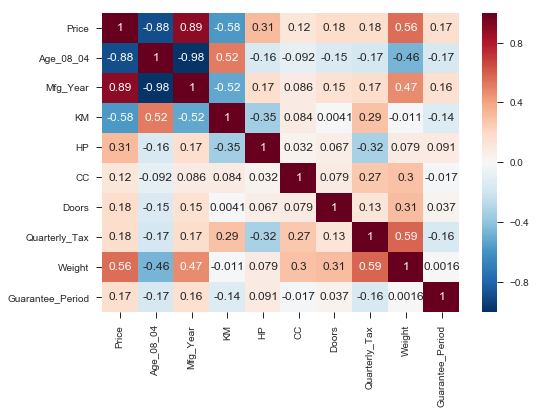

In [5]:
# 상관관계도

compare_feature = df_scatr.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)

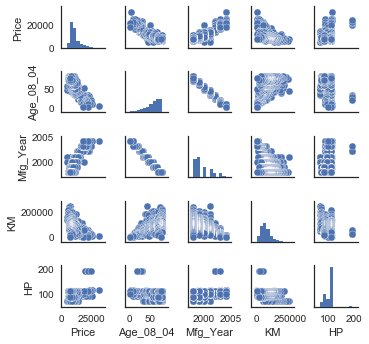

In [6]:
# 양적 변수들과 price와의 산점도

with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df_scatr.Price, df_scatr[cols_real01[:4]]], axis=1) ,size=1)
plt.show()

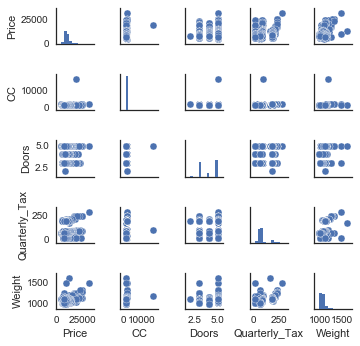

In [7]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df_scatr.Price, df_scatr[cols_real01[4:8]]], axis=1) ,size=1)
plt.show()

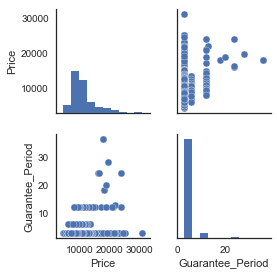

In [8]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df_scatr.Price, df_scatr.Guarantee_Period], axis=1), size=2)
plt.show()

## 3) 질적 변수간의 상관관계도와 산점도.

In [9]:
cols_cat01 = ['Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer','Price', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

cols_cat011 = ['Price', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2']

cols_cat012 = ['Price', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps']

cols_cat013 = ['Price', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']


# model은 unique 값이 너무 다양한 관계로 뺌.
# Price를 편의상 포함시킴.

df_scatc1 = pd.read_csv("train.csv", usecols=cols_cat011)               

print df_scatc1.columns
print df_scatc1.head()


Index([u'Price', u'Mfg_Month', u'Fuel_Type', u'Met_Color', u'Color',
       u'Automatic', u'Mfr_Guarantee', u'BOVAG_Guarantee', u'ABS', u'Airbag_1',
       u'Airbag_2'],
      dtype='object')
   Price  Mfg_Month Fuel_Type  Met_Color   Color  Automatic  Mfr_Guarantee  \
0  13500         10    Diesel          1    Blue          0              0   
1  13750         10    Diesel          1  Silver          0              0   
2  13750          3    Diesel          0   Black          0              1   
3  20950          8    Petrol          0  Silver          0              1   
4  19600          8    Petrol          0     Red          0              1   

   BOVAG_Guarantee  ABS  Airbag_1  Airbag_2  
0                1    1         1         1  
1                1    1         1         1  
2                1    1         1         1  
3                1    1         1         1  
4                1    1         1         1  


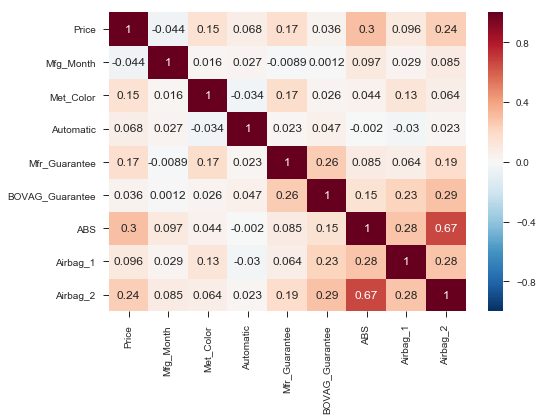

In [10]:
compare_feature = df_scatc1.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)

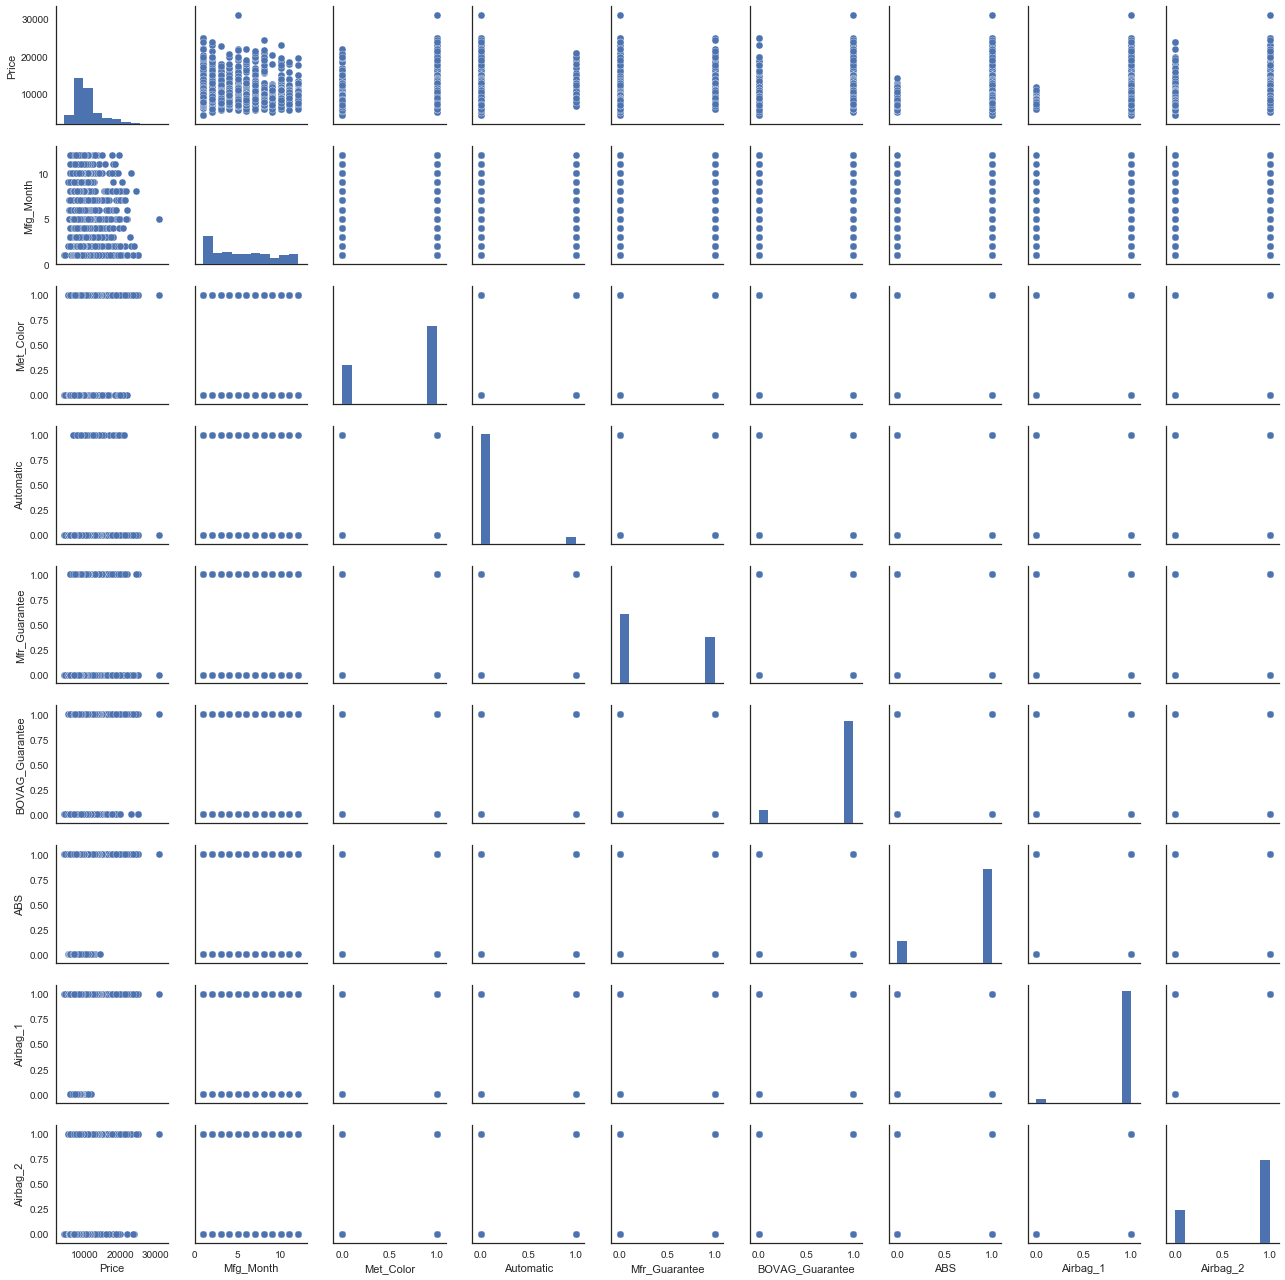

In [11]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df_scatc1.Price, df_scatc1[cols_cat011[1:]]],axis=1) ,size=2)
plt.show()

#산점도로는 질적변수 x price 간의 유의미한 그림을 도출할 수 없을 듯.

In [12]:
df_scatc2 = pd.read_csv("train.csv", usecols=cols_cat012)               

print df_scatc2.columns
print df_scatc2.head()

Index([u'Price', u'Airco', u'Automatic_airco', u'Boardcomputer', u'CD_Player',
       u'Central_Lock', u'Powered_Windows', u'Power_Steering', u'Radio',
       u'Mistlamps'],
      dtype='object')
   Price  Airco  Automatic_airco  Boardcomputer  CD_Player  Central_Lock  \
0  13500      0                0              1          0             1   
1  13750      1                0              1          1             1   
2  13750      1                0              1          0             1   
3  20950      1                1              0          1             1   
4  19600      1                1              1          0             1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  
0                1               1      0          0  
1                0               1      0          0  
2                1               1      0          1  
3                1               1      0          0  
4                1               1      0          1  


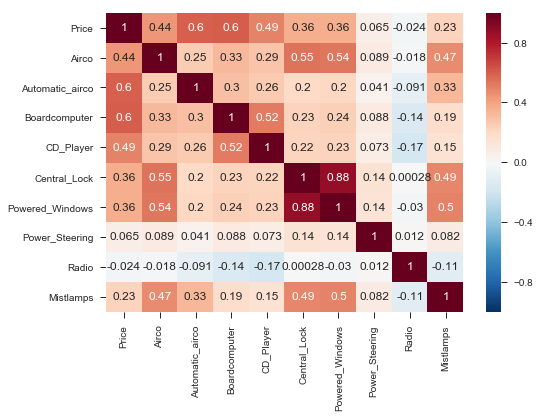

In [13]:
compare_feature = df_scatc2.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)

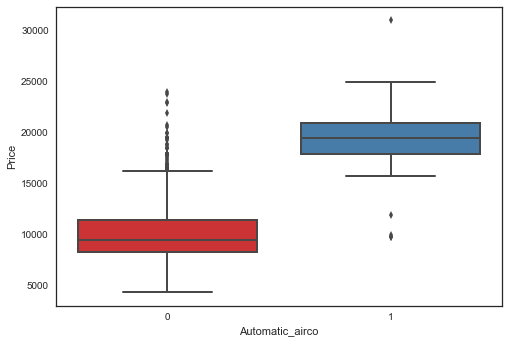

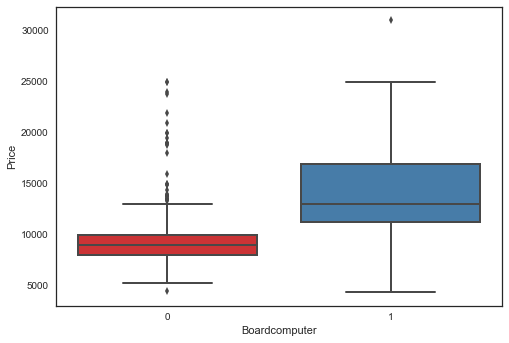

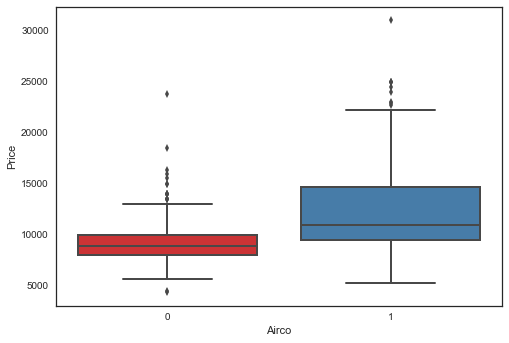

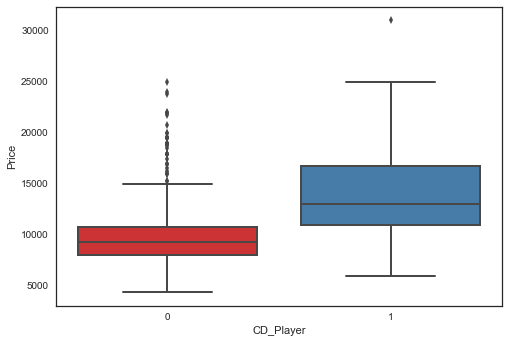

In [14]:
# 위의 질적변수 중에서 Price와 연관성이 높은 지수만 박스플롯화

def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=df_scatc2[feature], y=df_scatc2['Price'], linewidth=2, palette="Set1")
    plt.show()

        
display_boxplot('Automatic_airco')
display_boxplot('Boardcomputer')
display_boxplot('Airco')
display_boxplot('CD_Player')

In [15]:
df_scatc3 = pd.read_csv("train.csv", usecols=cols_cat013)               

print df_scatc3.columns
print df_scatc3.head()

Index([u'Price', u'Sport_Model', u'Backseat_Divider', u'Metallic_Rim',
       u'Radio_cassette', u'Parking_Assistant', u'Tow_Bar'],
      dtype='object')
   Price  Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  \
0  13500            0                 1             0               0   
1  13750            0                 1             0               0   
2  13750            0                 1             0               0   
3  20950            0                 0             1               0   
4  19600            1                 1             1               0   

   Parking_Assistant  Tow_Bar  
0                  0        0  
1                  0        0  
2                  0        0  
3                  0        0  
4                  0        0  


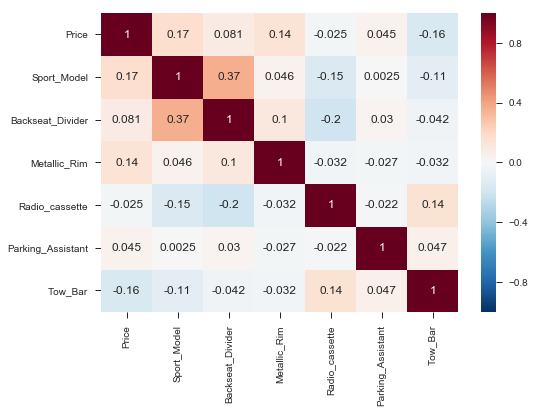

In [16]:
compare_feature = df_scatc3.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)

## 4) 데이터 상 주목해야할 변수들.(1차 분류)

### i) 양적변수

* Age_08_04'(연식): -0.88
* Mfg_Year(제조년): 0.89
* KM(주행거리): -0.58
* Weight(차 중량): 0.56


### ii) 질적변수

* 'Automatic_airco': 0.6
* 'Boardcomputer': 0.6
* 'CD_Player': 0.49
*  'Airco': 0.44


### iii) 유의해야할 변수

* 'Color'(차량 색깔): 박스플롯으로 확인하지 않았음 + 도메인 지식 


* 'Fuel_Type'(연료 형태): 박스플롯으로 확인하지 않았음 + 도메인 지식


* 'HP'(마력): 0.31에 불과하나 마력의 크기만큼 차량의 크기를 산정할 수 있음. 차 중량과 함께 차종의 부재를 메꿔줄 수 있을지도? 


* 'Quarterly_Tax'(환경부담금): 차의 연료 형태나, 차량의 크기에 따라 부담금에 변동이 있을 가능성이 있음.차종의 부재를 메꿔줄 수 있을 지도 모르는 후보2


* Mfr_Guarentee, BOVAG_Guarentee, Guarentee_Period: 수치는 매우 낮으나 도메인 지식


### iv) 주요 변수 탈락 이유들...

* 'Model'(차종) - 지표를 반영하기 위해 세대별로 나눠 분류해보는 시도를 해봤지만 유의미한 지표로서 작동하지 못함. 차 가격 결정에 있어서 차종의 중요성은 상식적으로 최상위권이지만, 문제는 너무나 다양한 차종이 존재하고, 차종별 차량 가격을 구할 수 있는 방법도 부재하며, 있다한들 엄청난 시간이 걸릴 것으로 생각하여, 완전히 제외. 모델 변수를 아예 빼놓고 Price 예측값을 낸다는 것은 어느 정도 오차를 각오해야하는 것과 같은 의미로 파악하고, 이를 대체할만한 변수를 고민하게 되었음. 여기에 중고차 가격 결정에 가장 큰 영향을 준다던 차량 사고유무 여부도 직접적으로 파악할 방법이 없는 관계로 다른 대체 변수로 간접파악해야하는 상황. 


### v) 과제.

1. mfg_year + month를 합친 지수 - 두 수치는 사실 같이 붙어 있어야 하는데 떨어져 있었음.

2. 중복되는 느낌이 강한 지수끼리 다중공선성 체크.

3. 사고 유무와 비례관계인 변수 - 주행거리, 연식

4. 차량 컬러와 차 연료 종류의 더미변수화와 효용성 제고.

5. 차종을 대체할만한 변수 - 차 무게, 마력, 연료 형태, 환경부담금, 보증 3종세트 간의 상관도 체크.(다중공선성)

6. 선정된 주요변수들의 표준화(feature scailing) -> 이건 전처리 step에서 다룸.




## 5) 과제 수행.

### i) mfg_year + month의 결합.

* month 자체는 아무런 의미가 없는 수치다. 하지만 mfg_year과 결합한다면 mfg_year가 좀 더 강한 수치로 거듭날 수 있을 것이다.(상식) 두 수치의 합본과 Price 및 다른 수치들과의 상관관계를 체크해보자.

* 결합방식 = 2002년 + 1월이라고 한다면 = 2002 + (1/12)이 합리적이고 2002.08xx 이런 꼴로 값이 나올 것이다.

* 공식화(mfg_time) = (mfg_year + (1/12 * month) 


In [17]:
#1차로 간택받은 주요수치들로 dataframe 형성

selection1 = ['Price', 'Age_08_04', 'Mfg_Year', 'Mfg_Month', 'KM', 'HP', 'Weight', 'Quarterly_Tax',
              'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Airco']

df02 = pd.read_csv("train.csv", usecols=selection1)    

print df02.columns
print df02.shape
print df02.head()

Index([u'Price', u'Age_08_04', u'Mfg_Month', u'Mfg_Year', u'KM', u'HP',
       u'Quarterly_Tax', u'Weight', u'Airco', u'Automatic_airco',
       u'Boardcomputer', u'CD_Player'],
      dtype='object')
(1019, 12)
   Price  Age_08_04  Mfg_Month  Mfg_Year     KM   HP  Quarterly_Tax  Weight  \
0  13500         23         10      2002  46986   90            210    1165   
1  13750         23         10      2002  72937   90            210    1165   
2  13750         30          3      2002  38500   90            210    1170   
3  20950         25          8      2002  31461  192            100    1185   
4  19600         25          8      2002  32189  192            100    1185   

   Airco  Automatic_airco  Boardcomputer  CD_Player  
0      0                0              1          0  
1      1                0              1          1  
2      1                0              1          0  
3      1                1              0          1  
4      1                1              1    

In [18]:
#새로운 수치 mfg_time 도입.

df02["Mfg_Time"] = (10000 * df02["Mfg_Year"]) + (10000/12 * df02["Mfg_Month"])
df02.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Airco,Automatic_airco,Boardcomputer,CD_Player,Mfg_Time
0,13500,23,10,2002,46986,90,210,1165,0,0,1,0,20028330
1,13750,23,10,2002,72937,90,210,1165,1,0,1,1,20028330
2,13750,30,3,2002,38500,90,210,1170,1,0,1,0,20022499
3,20950,25,8,2002,31461,192,100,1185,1,1,0,1,20026664
4,19600,25,8,2002,32189,192,100,1185,1,1,1,0,20026664


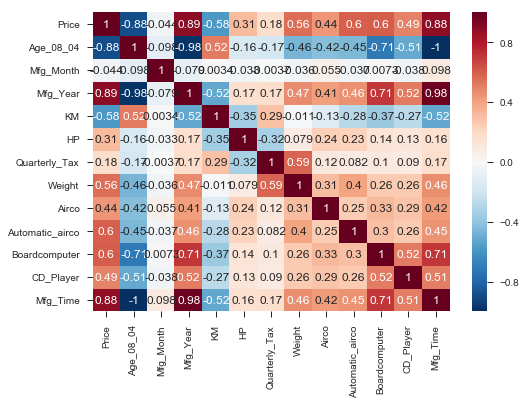

In [19]:
#mfg_time의 효과를 확인한다. 상관도

compare_feature = df02.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)


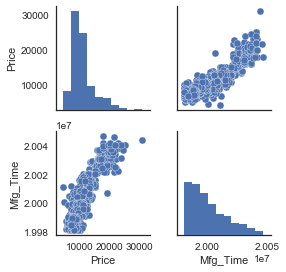

In [20]:
#Price와의 산점도

with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df02.Price, df02.Mfg_Time], axis=1), size=2)
plt.show()

#### 'Mfg_Time'에 대한 평가.

* 1995,1996 이렇게 단편적인 수치밖에 표현못하던 mfg_year보다 풍부한 range를 갖춘 수치가 되었음.

(ex) 1995/1/ => 19950083 

* price와의 상관관계도도 0.88 수준으로 거의 mfg_year가 보여주던 수준을 유지했고, 무쓸모였던 mfg_month가 갱생함.
* 아울러 연식을 의미하는 age_08_04와 상관관계도가 -1에 수렴하면서 안심하고 age_08_04를 제거할 수 있게 됐다.

### ii) 역할이 중복되는 듯한 변수 체크.selection1의 상관관계도를 참고하여)
#### 다중공선성 check

* 'Mfg_Time'의 등장으로 age_08_04, mfg_year, mfg_month를 소거할 수 있게 되었다.(1타 3피)


* 'KM'는 바로 위의 네 변수와 강한 상관성을 보이나, 중고차 가격에 있어서 가장 큰 변수라고 볼 수 있는 사고유무를 추정할 수 있는 유일한 수치(연식의 제거)가 되었기 때문에 빼지 않기로 했다.


* 'Weight'(0.56)는 mfg_year(0.47)와 'Quarterly_Tax'(0.59)와 높은 상관성을 보였는데, 전자는 큰 의미가 없는 수치인 것으로 추정되나, 환경부담금에 관해서는 사전 지식과 어느정도 상통하는 결과라고 본다. 차종 변수의 부재로 차종의 역할을 대신할 변수가 필요한데, Weight는 차종의 부재를 메워줄 수 있는 가장 중요한 변수라고 생각되었고, Quarterly_Tax는 차의 중량과 차의 연료를 반영해주는 지표라고 생각했기에 Quarterly_Tax의 존재는 Fuel_Type을 굳이 더미변수화시켜서 회귀모델에 반영하지 않아도 될 것 같은 느낌을 주었다.(추후에 확인해야겠지만) 


* CD_player와 Boardcomputer는 모두 Mfg_Time과 매우 높은 상관성(0.51, 0.71)을 보였는데, 아무래도 제조연월일이 늦을 수록 Mfg_Time 수치가 높아지는데, 제조연월일이 늦다라는 의미는 최신형 자동차에 가깝다는 것이고, 이러한 option들이 차량에 반영될 가능성이 매우 높다고도 볼 수 있지 않을까?


### iii) 더미변수화가 필요한 두 지표.

#### -  'Color'와 'Fuel_Type'

#### - Fuel_Type

In [21]:
selection2 = ['Price', 'Age_08_04', 'Mfg_Year', 'Mfg_Month', 'KM', 'HP', 'Weight', 'Quarterly_Tax',
              'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Airco', 'Fuel_Type', 'Color']

df03 = pd.read_csv("train.csv", usecols=selection2)    

# 1타 3피 제거

df03["Mfg_Time"] = (10000 * df03["Mfg_Year"]) + (10000/12 * df03["Mfg_Month"])
df03 = df03.drop(["Age_08_04"], axis=1)
df03 = df03.drop(["Mfg_Year"], axis=1)
df03 = df03.drop(["Mfg_Month"], axis=1)

# 'Fuel_Type' 변수를 더미변수화

df03 = pd.get_dummies(df03, columns=['Fuel_Type'])

print df03.columns
print df03.head()



#df03 = df03.drop(["Fuel_Type"], axis=1)
#df03 = df03.drop(["Color"], axis=1)
#print df03.head()
#step_1 = pd.concat([df, just_dummies], axis=1)      
#step_1.drop(['dummy', 'c'], inplace=True, axis=1)

#feature2 = [u'Fuel_Type_CNG', u'Fuel_Type_Diesel', u'Fuel_Type_Petrol',
       #u'Color_Beige', u'Color_Black', u'Color_Blue', u'Color_Green',
       #u'Color_Grey', u'Color_Red', u'Color_Silver', u'Color_Violet',
        #u'Color_White', u'Color_Yellow']


Index([u'Price', u'KM', u'HP', u'Color', u'Quarterly_Tax', u'Weight', u'Airco',
       u'Automatic_airco', u'Boardcomputer', u'CD_Player', u'Mfg_Time',
       u'Fuel_Type_CNG', u'Fuel_Type_Diesel', u'Fuel_Type_Petrol'],
      dtype='object')
   Price     KM   HP   Color  Quarterly_Tax  Weight  Airco  Automatic_airco  \
0  13500  46986   90    Blue            210    1165      0                0   
1  13750  72937   90  Silver            210    1165      1                0   
2  13750  38500   90   Black            210    1170      1                0   
3  20950  31461  192  Silver            100    1185      1                1   
4  19600  32189  192     Red            100    1185      1                1   

   Boardcomputer  CD_Player  Mfg_Time  Fuel_Type_CNG  Fuel_Type_Diesel  \
0              1          0  20028330              0                 1   
1              1          1  20028330              0                 1   
2              1          0  20022499              0         

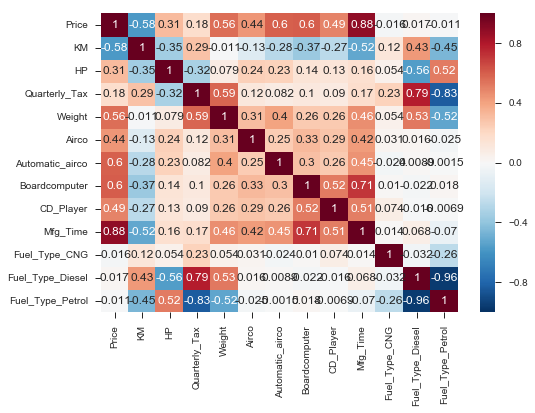

In [22]:
#df03(with fuel)의 상관도

compare_feature = df03.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)


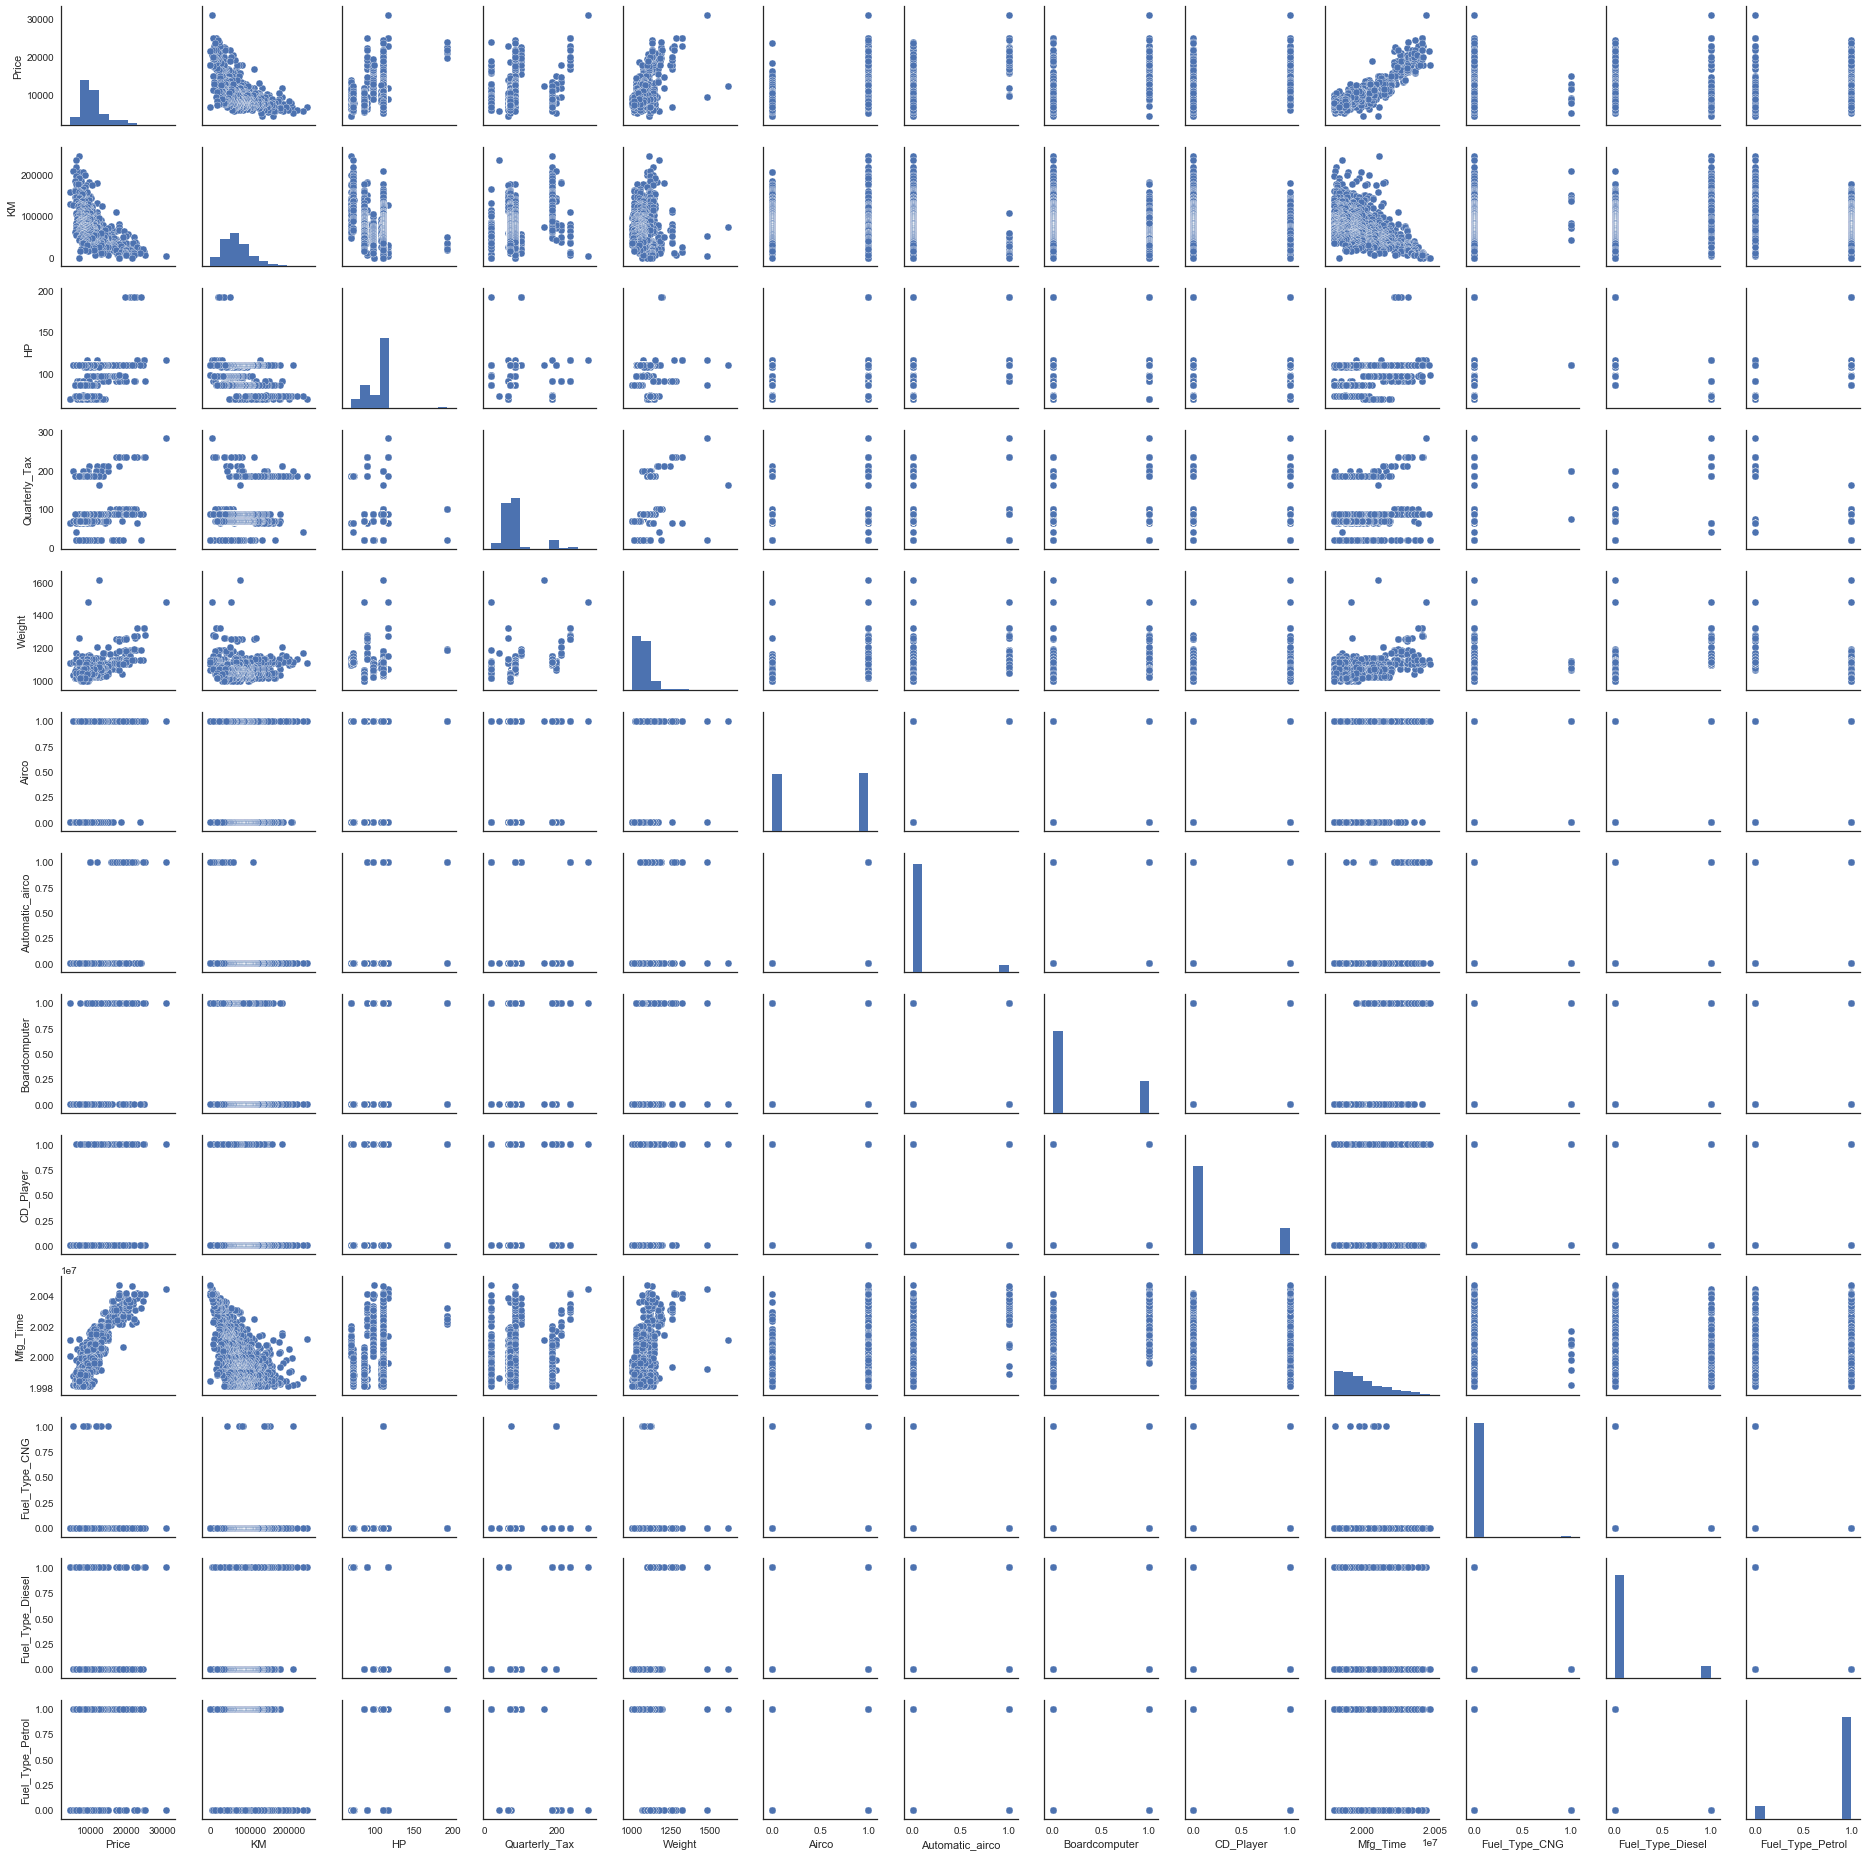

In [23]:
#df03(with fuel)의 산점도

feature1 = [u'Price', u'KM', u'HP', u'Quarterly_Tax', u'Weight', u'Airco',
            u'Automatic_airco', u'Boardcomputer', u'CD_Player', u'Mfg_Time', 
            u'Fuel_Type_CNG', u'Fuel_Type_Diesel', u'Fuel_Type_Petrol']

with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df03.Price, df03[feature1[1:]]],axis=1) ,size=2)
plt.show()

#### Fuel_Type 변수에 대한 고찰.

* Fuel_Type 3변수 모두 아주 미미한 수준의 Price와의 상관도를 보였다.(0.011, 0.016, 0.017)
* 디젤 차량과 석유 차량의 상관계수는 거의 1에 가까운 반비례관계다.
* 디젤차량일 경우에는 차의 중량과 환경부담금에 강한 비례관계다. 
* 석유차량일 경우에는 차의 마력과 강한 비례관계다.
* CNG는 디젤과 상관성이 거의 없다.

#### Fuel_Type 변수에 대한 결론.

* 가격에는 영향력이 거의 없고 차의 중량과 환경부담금, 마력등과 강한 연관성을 가지고 있어서, 없어도 다른 변수에 의해 충분히 보완이 될 듯 싶다. 굳이 사용할 거라면 디젤차량과 CNG 유무 2개 남겨두고 상관수치를 체크해보자.

#### - color

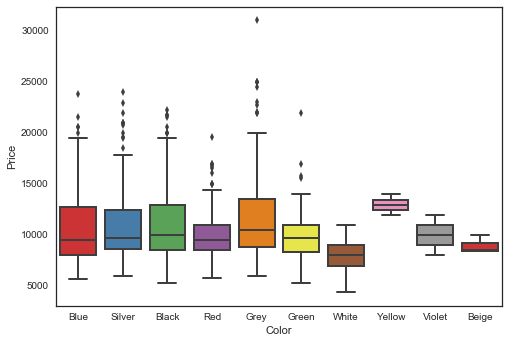

In [24]:
# 영원히 필요없을 페트롤 변수 제거

df03 = df03.drop(["Fuel_Type_Petrol"], axis=1)

# 색깔에 관한 박스플롯 먼저 확인.

with plt.style.context(('seaborn-white')):
        sns.boxplot(x=df03['Color'], y=df03['Price'], linewidth=2, palette="Set1")
plt.show()



In [25]:
# color 항목의 더미변수화

df03 = pd.get_dummies(df03, columns=['Color'])

print df03.columns
print df03.head()

Index([u'Price', u'KM', u'HP', u'Quarterly_Tax', u'Weight', u'Airco',
       u'Automatic_airco', u'Boardcomputer', u'CD_Player', u'Mfg_Time',
       u'Fuel_Type_CNG', u'Fuel_Type_Diesel', u'Color_Beige', u'Color_Black',
       u'Color_Blue', u'Color_Green', u'Color_Grey', u'Color_Red',
       u'Color_Silver', u'Color_Violet', u'Color_White', u'Color_Yellow'],
      dtype='object')
   Price     KM   HP  Quarterly_Tax  Weight  Airco  Automatic_airco  \
0  13500  46986   90            210    1165      0                0   
1  13750  72937   90            210    1165      1                0   
2  13750  38500   90            210    1170      1                0   
3  20950  31461  192            100    1185      1                1   
4  19600  32189  192            100    1185      1                1   

   Boardcomputer  CD_Player  Mfg_Time      ...       Color_Beige  Color_Black  \
0              1          0  20028330      ...                 0            0   
1              1          1

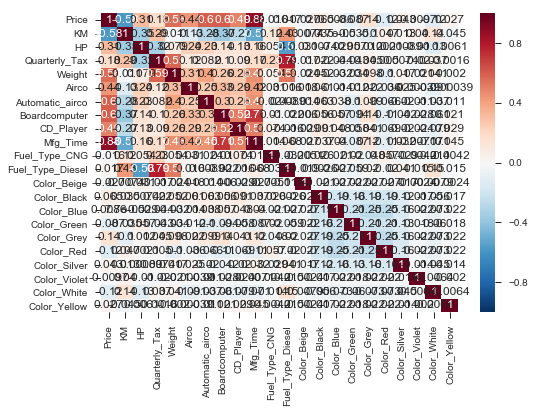

In [26]:
compare_feature = df03.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)

#### Color 변수에 대한 고찰.

* 색이 여러개인 만큼, 각 색깔이 역시나 Price에 대해 미미한 상관률을 보였다.(제일 높은게 회색 - 0.14)
* 색깔 변수끼리 각각 0.2 수준의 반비례 관계를 보이는데, 모두 상식수준임.
* 박스플롯을 보더라도 직관적으로 큰 차이를 유도하진 못한다. 굳이 사용을 하겠다면 모든 칼라를 다 도입해야하는데 그 실익이 얼마나 될 지...(일단 유보.)  


### iv) 차종을 대체할만한 변수 - 차 무게, 마력, 연료 형태, 환경부담금, 오토메틱, 보증 3종세트 간의 상관도 체크.(다중공선성) 

In [27]:
selection3  = ['Price', 'HP', 'Weight', 'Quarterly_Tax', 'Fuel_Type', 'Color', 'Automatic', 
               'Mfr_Guarantee', 'BOVAG_Guarantee','Mfg_Year', 'Mfg_Month', 'Guarantee_Period']

df04 = pd.read_csv("train.csv", usecols=selection3)    

# 1타 3피

df04["Mfg_Time"] = (10000 * df04["Mfg_Year"]) + (10000/12 * df04["Mfg_Month"])
df04 = df04.drop(["Mfg_Year"], axis=1)
df04 = df04.drop(["Mfg_Month"], axis=1)

# Fuel 변수 2개 추가

df04 = pd.get_dummies(df04, columns=['Fuel_Type'])
df04 = df04.drop(["Fuel_Type_Petrol"], axis=1)

df04.head()


,Price,HP,Color,Automatic,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,Mfg_Time,Fuel_Type_CNG,Fuel_Type_Diesel
0,13500,90,Blue,0,210,1165,0,1,3,20028330,0,1
1,13750,90,Silver,0,210,1165,0,1,3,20028330,0,1
2,13750,90,Black,0,210,1170,1,1,3,20022499,0,1
3,20950,192,Silver,0,100,1185,1,1,12,20026664,0,0
4,19600,192,Red,0,100,1185,1,1,3,20026664,0,0


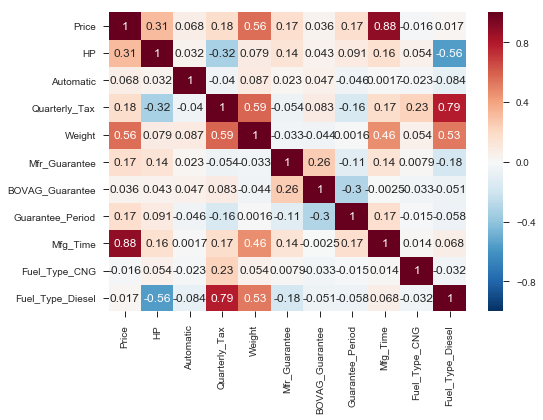

In [28]:
compare_feature = df04.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)

#### 오토메틱과 개런티 3인방에 대한 고찰.

* 오토메틱과 개런티 3인방이 Price에 끼치는 절대적인 영향력은 작지만, 다른 주요 변수와 상관성 역시 매우 낮기 때문에, 다중공선성이 매우 낮은 독립적 지표라고 볼 수 있다.
* 특히 개런티 3인방은 서로 간의 상관관계치가 매우 낮아서 상호독립적이다.
* 오토메틱과 개런티 3인방의 경우에는 성중기 대표님이 중요하다고 강조했던 요소 중 하나이기 때문에, 가격과의 절대적 상관성이 매우 낮고 다른 개런티 2인방과 약간 높은 상관성을 보이는 BOVAG_Guarentee만 제거하고 나머지 세 변수 모두 2차 후보군에 넣어보고자 한다.


### v) 제2차 변수 선정 결과.

#### 강한 확신을 주는 변수(가격에 대한 상관도 높고 다중공선성이 낮음)

* 'Mfg_Time', 'KM', 'HP', 'Weight', 'Quarterly_Tax', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Airco'

#### 미미하지만 도움은 되는 지수(도메인 + 다중공선성이 매우 낮음)
 
* 'Automatic','Mfr_Guarantee','Guarantee_Period'

#### 도움이 될까 싶은 지수(도메인만 있음.)

* 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Color'

## (2) 전처리(Preprocessing)

* 위에서 이미 Dummy 변수 처리는 끝냈음.

* Data Clensing - 여기 train.csv에는 NaN데이터가 없으므로 해줄 필요 x.

* Feature Scailing

* Outlier Detection



### 1) Feature Scailing

* 양적변수들의 표준화 작업을 해서 회귀모델 값이 예쁘게 나올 수 있도록 바꿔준다.  

In [29]:
selection4 = ['Price', 'Mfg_Year', "Mfg_Month", 'KM', 'HP', 'Weight', 'Quarterly_Tax', 'Automatic_airco', 
              'Boardcomputer', 'CD_Player', 'Airco', 'Automatic','Mfr_Guarantee','Guarantee_Period', 
              'Fuel_Type']


# 사실상 selection4 = [u'Price', u'KM', u'HP', u'Automatic', u'Quarterly_Tax', u'Weight', u'Mfr_Guarantee', u'Guarantee_Period', u'Airco', u'Automatic_airco',u'Boardcomputer', u'CD_Player', u'Mfg_Time', u'Fuel_Type_CNG', u'Fuel_Type_Diesel']

df05 = pd.read_csv("train.csv", usecols=selection4)    

# 1타 3피("Mfg_Time"생성)

df05["Mfg_Time"] = (10000 * df05["Mfg_Year"]) + (10000/12 * df05["Mfg_Month"])
df05 = df05.drop(["Mfg_Year"], axis=1)
df05 = df05.drop(["Mfg_Month"], axis=1)

# Fuel 변수 2개 추가

df05 = pd.get_dummies(df05, columns=['Fuel_Type'])
df05 = df05.drop(["Fuel_Type_Petrol"], axis=1)

print df05.columns
print df05.head()

Index([u'Price', u'KM', u'HP', u'Automatic', u'Quarterly_Tax', u'Weight',
       u'Mfr_Guarantee', u'Guarantee_Period', u'Airco', u'Automatic_airco',
       u'Boardcomputer', u'CD_Player', u'Mfg_Time', u'Fuel_Type_CNG',
       u'Fuel_Type_Diesel'],
      dtype='object')
   Price     KM   HP  Automatic  Quarterly_Tax  Weight  Mfr_Guarantee  \
0  13500  46986   90          0            210    1165              0   
1  13750  72937   90          0            210    1165              0   
2  13750  38500   90          0            210    1170              1   
3  20950  31461  192          0            100    1185              1   
4  19600  32189  192          0            100    1185              1   

   Guarantee_Period  Airco  Automatic_airco  Boardcomputer  CD_Player  \
0                 3      0                0              1          0   
1                 3      1                0              1          1   
2                 3      1                0              1          0  

In [30]:
# 이중에서 표준화가 필요한 양적변수만 모은다.

selection4s = [u'Price', u'KM', u'HP', u'Quarterly_Tax', u'Weight', u'Guarantee_Period', u'Mfg_Time']

# 각각의 변수를 standardization 시킨다.

Price_mean = df05.Price.mean()
Price_std = df05.Price.std()

KM_mean = df05.KM.mean()
KM_std = df05.KM.std()

HP_mean = df05.HP.mean()
HP_std = df05.HP.std()

Quarterly_Tax_mean = df05.Quarterly_Tax.mean()
Quarterly_Tax_std = df05.Quarterly_Tax.std()

Weight_mean = df05.Weight.mean()
Weight_std = df05.Weight.std()

Guarantee_Period_mean = df05.Guarantee_Period.mean()
Guarantee_Period_std = df05.Guarantee_Period.std()

Mfg_Time_mean = df05.Mfg_Time.mean()
Mfg_Time_std = df05.Mfg_Time.std()

df05["Price_st"] = (df05.Price - Price_mean)/Price_std
df05["KM_st"] = ( df05.KM- KM_mean)/KM_std
df05["HP_st"] = ( df05.HP- HP_mean)/HP_std
df05["Quarterly_Tax_st"] = ( df05.Quarterly_Tax- Quarterly_Tax_mean)/Quarterly_Tax_std
df05["Weight_st"] = ( df05.Weight- Weight_mean)/Weight_std
df05["Guarantee_Period_st"] = ( df05.Guarantee_Period-Guarantee_Period_mean)/Guarantee_Period_std
df05["Mfg_Time_st"] = ( df05.Mfg_Time-Mfg_Time_mean)/Mfg_Time_std

print df05.columns
print df05.head()


Index([u'Price', u'KM', u'HP', u'Automatic', u'Quarterly_Tax', u'Weight',
       u'Mfr_Guarantee', u'Guarantee_Period', u'Airco', u'Automatic_airco',
       u'Boardcomputer', u'CD_Player', u'Mfg_Time', u'Fuel_Type_CNG',
       u'Fuel_Type_Diesel', u'Price_st', u'KM_st', u'HP_st',
       u'Quarterly_Tax_st', u'Weight_st', u'Guarantee_Period_st',
       u'Mfg_Time_st'],
      dtype='object')
   Price     KM   HP  Automatic  Quarterly_Tax  Weight  Mfr_Guarantee  \
0  13500  46986   90          0            210    1165              0   
1  13750  72937   90          0            210    1165              0   
2  13750  38500   90          0            210    1170              1   
3  20950  31461  192          0            100    1185              1   
4  19600  32189  192          0            100    1185              1   

   Guarantee_Period  Airco  Automatic_airco     ...       Mfg_Time  \
0                 3      0                0     ...       20028330   
1                 3      1  

In [31]:
# 표준화가 끝난 df06

selection4 = ['Price', 'Mfg_Year', "Mfg_Month", 'KM', 'HP', 'Weight', 'Quarterly_Tax', 'Automatic_airco', 
              'Boardcomputer', 'CD_Player', 'Airco', 'Automatic','Mfr_Guarantee','Guarantee_Period', 
              'Fuel_Type']


df06 = pd.read_csv("train.csv", usecols=selection4)    

# 1타 3피("Mfg_Time"생성)

df06["Mfg_Time"] = (10000 * df06["Mfg_Year"]) + (10000/12 * df06["Mfg_Month"])
df06 = df06.drop(["Mfg_Year"], axis=1)
df06 = df06.drop(["Mfg_Month"], axis=1)

# Fuel 변수 2개 추가

df06 = pd.get_dummies(df06, columns=['Fuel_Type'])
df06 = df06.drop(["Fuel_Type_Petrol"], axis=1)

# 표준화

KM_mean = df06.KM.mean()
KM_std = df06.KM.std()

HP_mean = df06.HP.mean()
HP_std = df06.HP.std()

Quarterly_Tax_mean = df06.Quarterly_Tax.mean()
Quarterly_Tax_std = df06.Quarterly_Tax.std()

Weight_mean = df06.Weight.mean()
Weight_std = df06.Weight.std()

Guarantee_Period_mean = df06.Guarantee_Period.mean()
Guarantee_Period_std = df06.Guarantee_Period.std()

Mfg_Time_mean = df06.Mfg_Time.mean()
Mfg_Time_std = df06.Mfg_Time.std()

df06["KM_st"] = (df06.KM - KM_mean)/KM_std
df06["HP_st"] = (df06.HP - HP_mean)/HP_std
df06["Quarterly_Tax_st"] = (df06.Quarterly_Tax - Quarterly_Tax_mean)/Quarterly_Tax_std
df06["Weight_st"] = (df06.Weight - Weight_mean)/Weight_std
df06["Guarantee_Period_st"] = ( df06.Guarantee_Period - Guarantee_Period_mean)/Guarantee_Period_std
df06["Mfg_Time_st"] = (df06.Mfg_Time - Mfg_Time_mean)/Mfg_Time_std

# 표준화된 raw columns 제거

df06 = df06.drop(["KM"], axis=1)
df06 = df06.drop(["HP"], axis=1)
df06 = df06.drop(["Quarterly_Tax"], axis=1)
df06 = df06.drop(["Weight"], axis=1)
df06 = df06.drop(["Guarantee_Period"], axis=1)
df06 = df06.drop(["Mfg_Time"], axis=1)

print df06.columns
print df06.shape
print df06.head()

Index([u'Price', u'Automatic', u'Mfr_Guarantee', u'Airco', u'Automatic_airco',
       u'Boardcomputer', u'CD_Player', u'Fuel_Type_CNG', u'Fuel_Type_Diesel',
       u'KM_st', u'HP_st', u'Quarterly_Tax_st', u'Weight_st',
       u'Guarantee_Period_st', u'Mfg_Time_st'],
      dtype='object')
(1019, 15)
   Price  Automatic  Mfr_Guarantee  Airco  Automatic_airco  Boardcomputer  \
0  13500          0              0      0                0              1   
1  13750          0              0      1                0              1   
2  13750          0              1      1                0              1   
3  20950          0              1      1                1              0   
4  19600          0              1      1                1              1   

   CD_Player  Fuel_Type_CNG  Fuel_Type_Diesel     KM_st     HP_st  \
0          0              0                 1 -0.558181 -0.775074   
1          1              0                 1  0.125351 -0.775074   
2          0              0   

#### 사실상 selection 구성 요소.(지금까지)

selection5 = [ u'Price', u'KM_st', u'HP_st',
              u'Quarterly_Tax_st', u'Weight_st', u'Guarantee_Period_st',
              u'Mfg_Time_st', u'Automatic', u'Mfr_Guarantee', u'Airco', 
              u'Automatic_airco', u'Boardcomputer', u'CD_Player', u'Fuel_Type_CNG',
              u'Fuel_Type_Diesel']

* 컬러를 제외한 총 15개 요소.

### 2) Outlier Detection.

* 박스플롯으로 아웃라이어 현황을 확인한 다음에 자체 제작한 함수로 제거하는 시스템 구축에 성공.

* 허나, full로 돌렸을 때 무려 300개가 넘는 id들이 제거되는 데다, data set 자체가 하자가 없이 잘 가공되어있기 때문에, 굳이 제거하기 보다는 최대한 활용하자는 쪽으로 의견이 모였음.

* 실제로 활용하지는 않았지만 아웃라이어 제거를 위한 pipeline이 우리에게도 있었습니다.

In [32]:
df1 = pd.read_csv('train.csv')

def display_boxplot(feature): #박재근 매니저님꺼 따왔음.
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=df1[feature], y=df1['Price'], linewidth=1, palette="Set1")
    plt.show()

def find_outlier_num(df): #이상치 min, max 값 구하는 함수
    iqr = np.percentile(df['Price'],75)-np.percentile(df['Price'],25)
    outlier_min = np.percentile(df['Price'],25) - iqr*1.5
    outlier_max = np.percentile(df['Price'],75) + iqr*1.5
    return outlier_min, outlier_max


def find_outlier(out_min, out_max): # 
    #plus_outlier = df1.loc[df1['Price'] > out_plus]
    #minus_outlier= df1.loc[df1['Price'] < out_minus]
    over = df1[df1.Price > out_max]
    under = df1[df1.Price < out_min]
    return over, under


list_X = []
def outlier_pross(feature, feat_num):
    global list_X
    temp = df1.loc[df1['Price'] > -1 ].loc[df1[feature] == feat_num] 
    #print temp[feature]
    out_min, out_max = find_outlier_num(temp)
    plus_result, minus_result = find_outlier(out_min, out_max)
    deleteplus_idx = temp[df1['Id'].isin(plus_result['Id'])]
    deleteminus_idx = temp[df1['Id'].isin(minus_result['Id'])]
    #out1 = plus_result['Id'].unique()
    #out2 = minus_result['Id'].unique()
    #print 'deleteplus_idx',deleteplus_idx , 'deleteminus_idx',deleteminus_idx
    if not deleteplus_idx.empty:
        for i in deleteplus_idx.index:
            df1.drop(i, inplace=True)
    if not deleteminus_idx.empty:
        for i in deleteminus_idx.index:
            df1.drop(i, inplace=True)
    #deleteplus_idx = df1[df1['Id'].isin(plus_result['Id'])].index.values
    #deleteminus_idx = df1[df1['Id'].isin(minus_result['Id'])].index.values
    
    #print 'deleteplus_idx',deleteplus_idx ,'deleteminus_idx', deleteminus_idx
    #print df1.iloc[deleteplus_idx].shape, '상향 이상치 제거' , df1.iloc[deleteminus_idx].shape, '하향 이상치 제거'

            

In [33]:
var_list = ['Color']

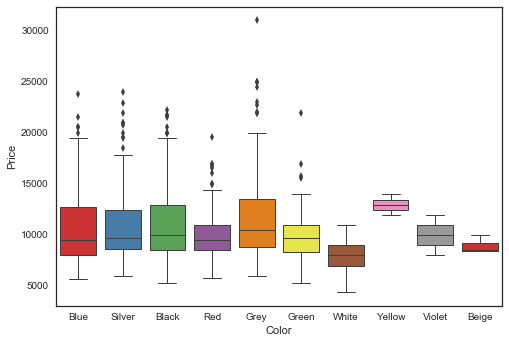

['Blue' 'Silver' 'Black' 'Red' 'Grey' 'Green' 'White' 'Yellow' 'Violet'
 'Beige']
Blue


C:\Python27\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python27\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


1014
Silver
1003
Black
995
Red
986
Grey
976
Green
972
White
972
Yellow
972
Violet
972
Beige
972


In [34]:
for i in var_list:
    display_boxplot(i)
    # print i
    i_uni = df1[i].unique()
    print i_uni
    for j in i_uni:
        print j
        outlier_pross(i,j)
        print len(df1)

In [35]:
var_list = [ 'Mfg_Month', 'Mfg_Year', 'Age_08_04', 'BOVAG_Guarantee' , 'ABS' ,'Automatic_airco', \
            'Color' ,'KM','Fuel_Type', 'HP', 'Quarterly_Tax','Weight', 'Mfr_Guarantee',\
            'Guarantee_Period', 'Automatic','Powered_Windows','Metallic_Rim','Sport_Model',\
           'Doors','Tow_Bar']

In [36]:
for i in var_list:
    #display_boxplot(i)
    print i
    i_uni = df1[i].unique()
    print i_uni
    for j in i_uni:
        #print j
        outlier_pross(i,j)
    print len(df1)

Mfg_Month
[10  3  9  4  5  8  6  7 11  1  2 12]


C:\Python27\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Python27\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


914
Mfg_Year
[2002 2003 2004 2001 2000 1999 1998]
898
Age_08_04
[23 30 28 29 27 26 22 32 31 19 20  7 38 40 41 44 42 35 43 37 34 33 36 39 54
 45 55 51 53 48 50 52 47 49 46 56 58 68 59 62 67 64 61 65 66 63 57 60 73 78
 79 69 80 76 77 71 74 70 75 72]
879
BOVAG_Guarantee
[1 0]
855
ABS
[1 0]
831
Automatic_airco
[0 1]
830
Color
['Blue' 'Silver' 'Black' 'Red' 'Grey' 'Green' 'Yellow' 'White' 'Violet'
 'Beige']
827
KM
[ 46986  72937  38500   9750  49059  46961  45725 180638 179860 130062
 123425 110000 105699  96829  96518  91456  89757  85017  82743  81106
  78677  78425  78108  71200  67805  65988  65345  64564  63459  62000
  61300  61000  60829  58798  58363  55678  55539  54600  53773  53644
  53350  53000  51945  50873  50856  50640  50000  49291  48928  48052
  48000  47350  46821  46694  46515  45713  45600  45287  45081  44830
  44218  43632  43427  42823  42560  41754  41499  41000  40000  39650
  39516  39000  38932  38812  38653  38461  37576  37533  37389  37320
  37000  36566  362

## (3) Model Selection(회귀 모델 설정)

* 다중 회귀 분석 후 변수 최종 선택.

* 크로스 밸리데이션.

* 회귀 모델군 평가.


### 1) 다중 회귀 분석 및 변수 최종 선택.

* 원래 데이터의 형태를 보고 어떤 모델(model)을 투입해야하는 단계.

* 허나, 이번 팀프로젝트에서는 '다중 선형 회귀 분석 모델'로 분석하는 것으로 fix됐기에, 이를 전제로 진행.


#### i) 표준화된 변수로 재탐색.

* 표준화를 하나 안하나 그래프 형태는 별반 다를 것이 없었음.

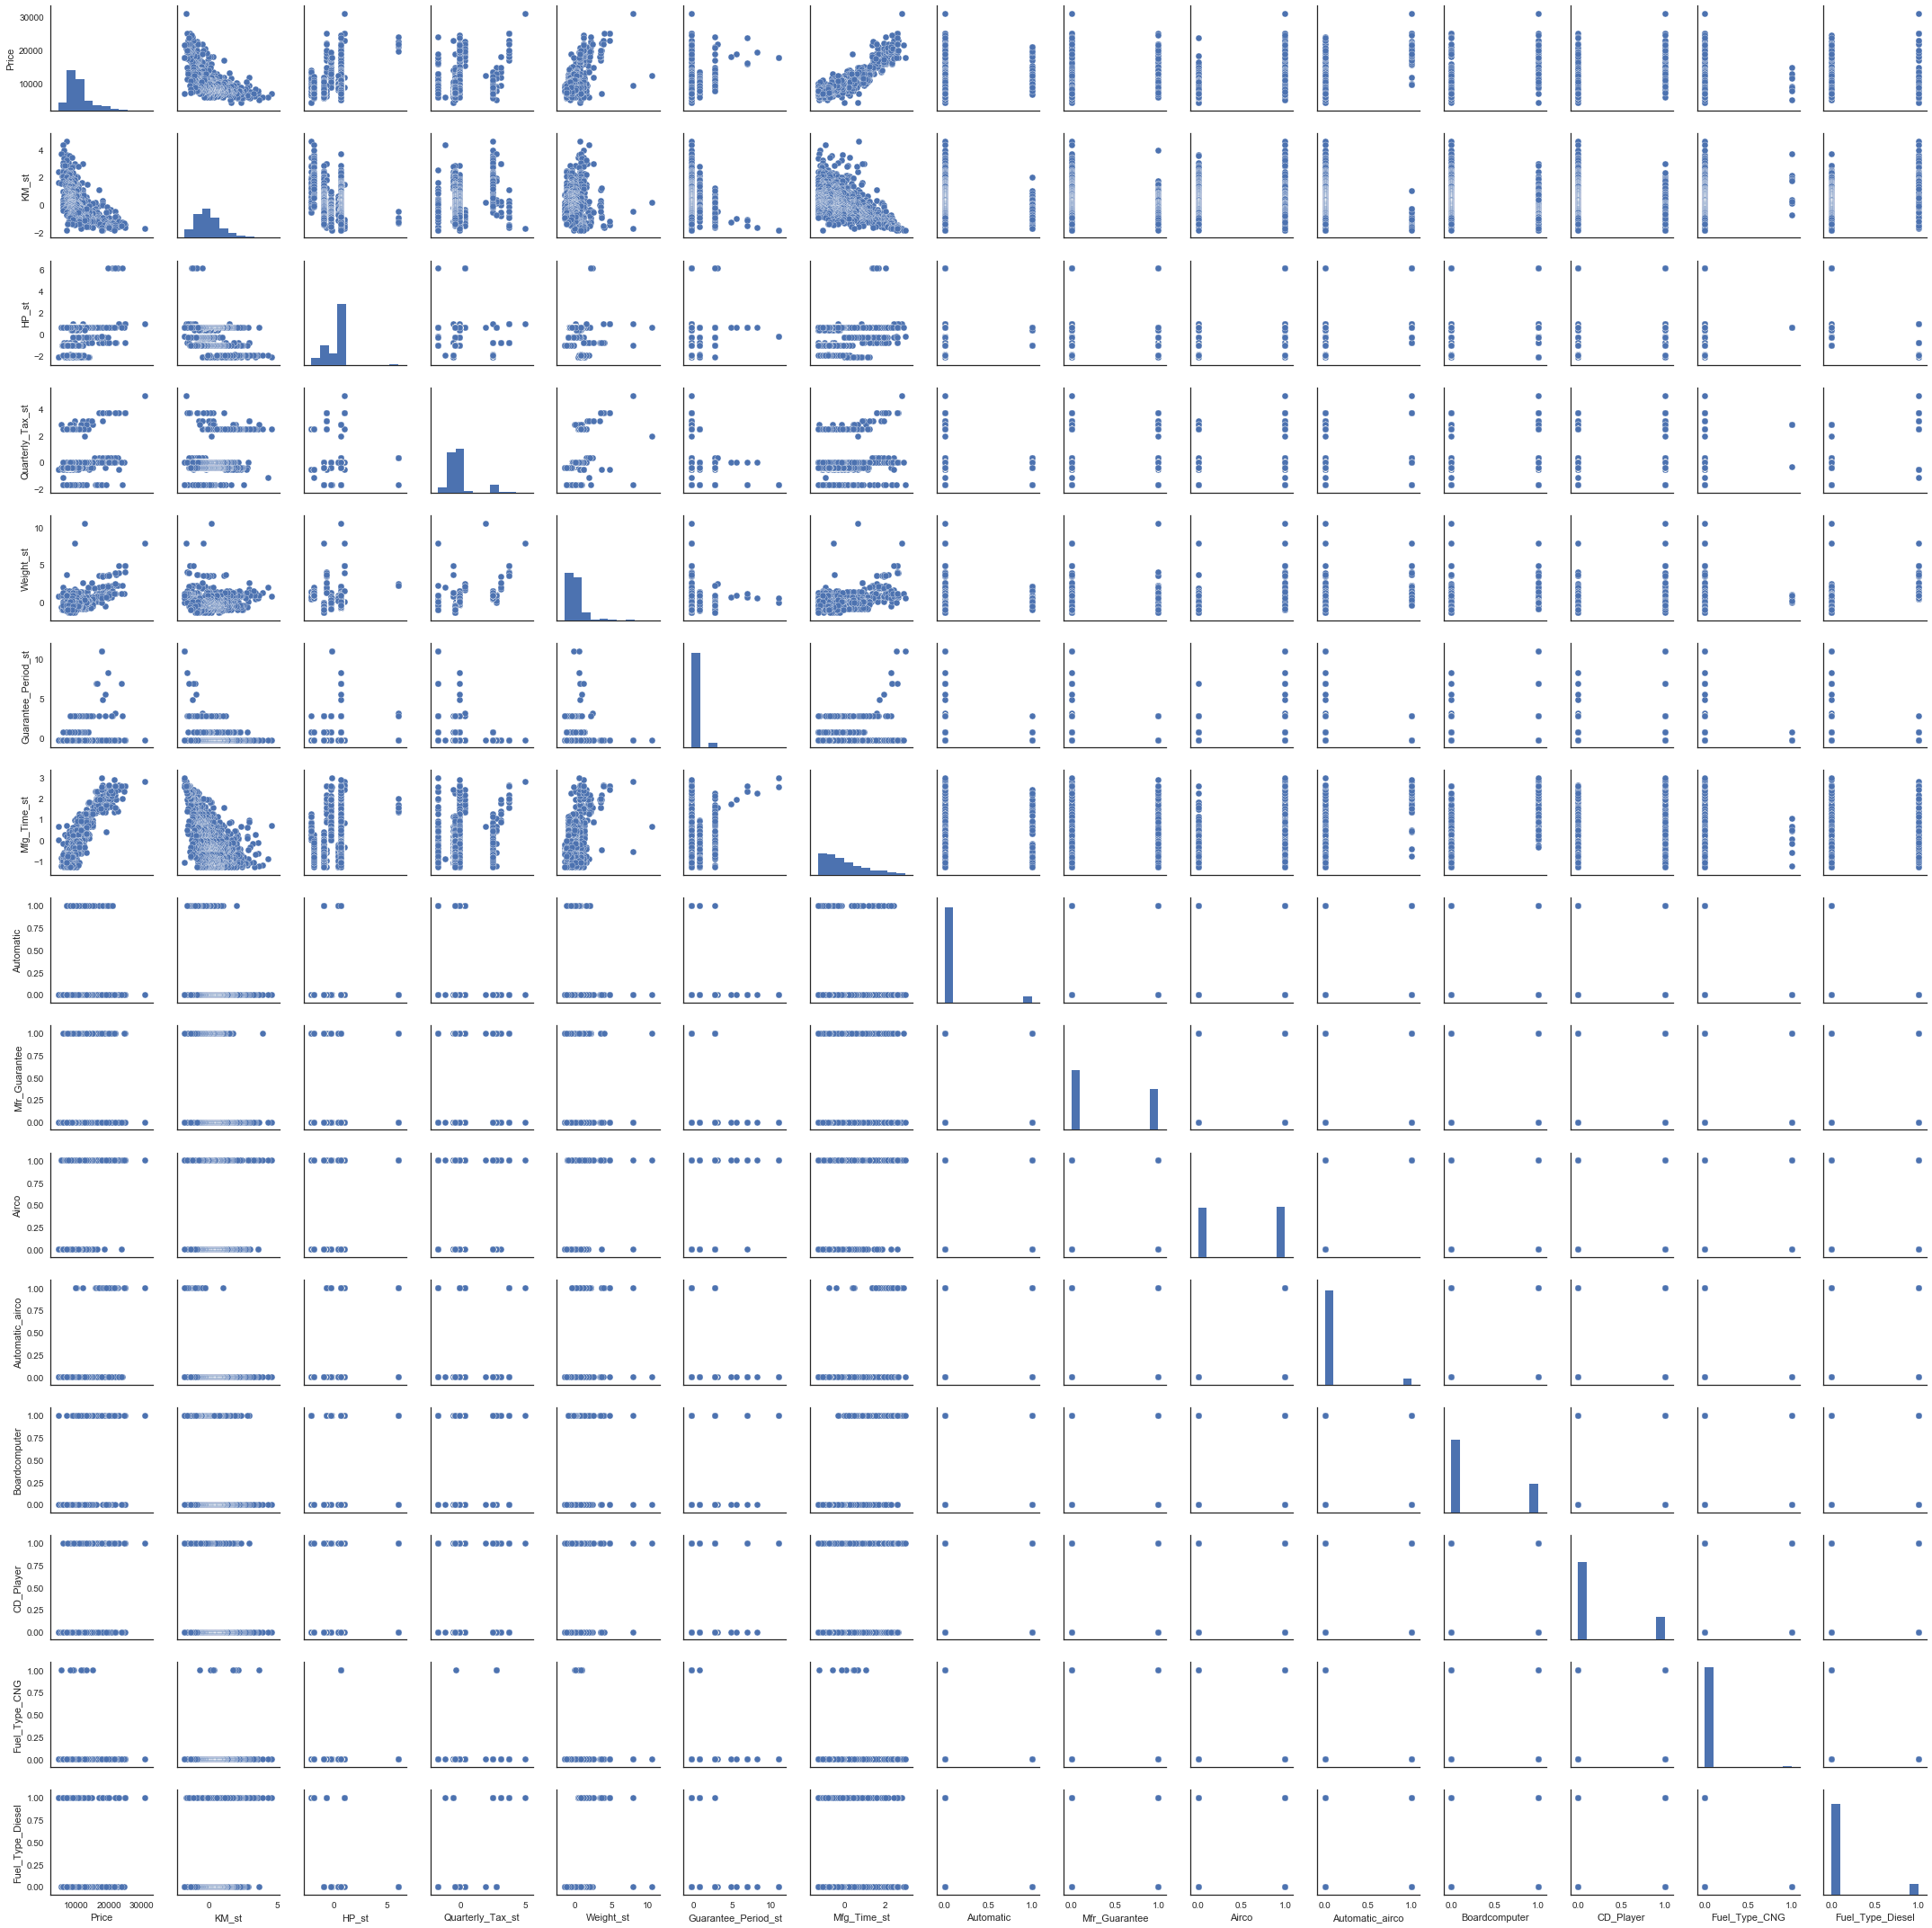

In [37]:
# price_st 대비 변수들의 산점도

selection51 = [ u'Price', u'KM_st', u'HP_st',
              u'Quarterly_Tax_st', u'Weight_st', u'Guarantee_Period_st',
              u'Mfg_Time_st', u'Automatic', u'Mfr_Guarantee', u'Airco', 
              u'Automatic_airco', u'Boardcomputer', u'CD_Player', u'Fuel_Type_CNG',
              u'Fuel_Type_Diesel']


with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df06.Price, df06[selection51[1:]]],axis=1) ,size=2)
plt.show()




### ii) 회귀 모델 별 테스트


* 표준화를 제외하고 이전 스텝까지는 셋 다 함께 공유하고 만들어왔다.


* 허나, 변수 선택과 회귀 모델을 만드는 데 있어서 각자의 생각이 다를 수 있음을 인정하고, 각자가 독자적인 모델을 만들고 Residual Analysis(잔차 분석)이나 Validation 혹은 Cross_Validation 방식을 통해 우수하고 안정성있는 모델을 뽑기로 결정했다.


* 셋 다 공통적으로 도메인 지식의 영향 때문에 좀처럼 'color', 'fuel_type'에 대한 미련을 버리지 못한 것이 각자의 아웃풋에서 묻어나왔다. 하지만 공동의 결론 역시 비슷했다. '크게 도움이 되는 것 같지는 않다.'


* 용균이는 기어이 모델을 써보겠다고 'model' 변수를 세대별로 분류하여 더미변수화 시켰지만 결과는 매우 실망스러웠고, 소령이는 color에 대한 미련을 떨치지 못하고 기어이 유채색, 무채색으로 나누어 더미변수화 시켰지만 소득은 없었다.


* 영인이는 신문물 R을 이용해 stepwise, forward, backward 방식으로 최소 AIC 값을 가진 최적화 변수 17개를 찾아내고, 이를 기반으로 일일히 더하고 빼기를 하는 엄청난 노가다를 감행하였다. 소령이는 이에 영향을 받아 자신의 모델에 이를 반영했지만, 용균이는 도입하지 않았다.(이유: 기계가 영혼없이 돌려서 산출한 변수에 신뢰를 깊게 줄 수 없다.) 


### a) 용균이가 구한 모델: 표준화한 14변수 기반의 회귀모델.(10변수)

In [38]:
# OLS로 첫번째 모델 통계량 추출.

model12 = smf.ols("Price ~ KM_st+ HP_st+Quarterly_Tax_st + Weight_st+ \
Guarantee_Period_st+Mfg_Time_st+ Automatic + Mfr_Guarantee + Airco + Automatic_airco + \
Boardcomputer+ CD_Player+ Fuel_Type_CNG +Fuel_Type_Diesel", df06).fit()

model12.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     589.0
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:18:50   Log-Likelihood:                -8662.5
No. Observations:                1019   AIC:                         1.735e+04
Df Residuals:                    1004   BIC:                         1.743e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.042e+04     86.571    120.306      0.000    1.02e+04    1.06e+04
KM_st                -616.4453     54.812    -11.247      0.000    -724.004    -508.887
HP_st                 293.0413     54.716      5.356      0.000     185.670     400.413
Quarterly_Tax_st      467.8379     73.946      6.327      0.000     322.731     612.945
Weight_st             598.7627     63.573      9.419      0.000     474.012     723.513
Guarantee_Period_st   221.9347     41.669      5.326      0.000     140.166     303.703
Mfg_Time_st          2076.6178     74.729     27.789      0.000    1929.975    2223.261
Automatic             208.3380    167.776      1.242      0.215    -120.895     537.571
Mfr_Guarantee         218.9838     80.655      2.715      0.007      60.712     377.255
Airco                 330.3766     86.702      3.810      0.000     160.239     500.515
Automatic_airco      2684.9860    190.190     14.117      0.000    2311.771    3058.201
Boardcomputer        -199.1850    129.057     -1.543      0.123    -452.438      54.068
CD_Player             333.1796    110.024      3.028      0.003     117.275     549.084
Fuel_Type_CNG       -1862.0774    457.607     -4.069      0.000   -2760.053    -964.102
Fuel_Type_Diesel    -1027.4606    295.944     -3.472      0.001   -1608.201    -446.720
==============================================================================
Omnibus:                       82.236   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.778
Skew:                           0.187   Prob(JB):                     1.25e-83
Kurtosis:                       5.975   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### OLS 레포트를 통해 알 수 있었던 점.

* 회귀모형 자체는 F-statistic:	589.0, Prob (F-statistic):0.00로 대립가설(회귀 모형의 타당함)이 입증되었다. \
  
* 허나, 각각의 독립변수들의 t통계량을 살펴보니, 'automatic'과 'boardcomputer', 'Mfr_guarantee'가 P>|t| 0.05 \ 이상의 수치를 나타냈기 때문에 유의한 영향을 끼친다고 볼 수 없다고 판단했다. 그래서 세 변수를 삭제하기로 했다.

* 차량의 연료 타입을 최대한 끼고 이를 회귀모델에 반영하려고 했는데, 디젤 차량 유무는 환경부담금을 비롯한 다른 차종 대체 변수(무게, HP 등)와 상당히 겹치는 부분이 마음에 걸렸었다. 오랫동안 고심한 끝에 디젤차량 유무 변수를 제거하고 환경부담금과 같은 다른 변수로 대체하면서 다중공선성을 최소화시키기로 결심했다. 대신 CNG차량 유무는 남기기로 했다. 이유는 디젤, 패트롤과 달리 다른 독립변수들에 끼치는 영향이 거의 없기에 독립성이 충분이 있다고 판단했기 때문이다.


In [39]:
# 총10변수 

dfprice = pd.read_csv("train.csv", usecols=["Price"])


selection5 = ['Mfg_Year', "Mfg_Month", 'KM', 'HP', 'Weight', 'Quarterly_Tax', 'Automatic_airco', 
              'CD_Player', 'Airco','Guarantee_Period', 'Fuel_Type']

df061 = pd.read_csv("train.csv", usecols=selection5)    

# 1타 3피("Mfg_Time"생성)

df061["Mfg_Time"] = (10000 * df061["Mfg_Year"]) + (10000/12 * df061["Mfg_Month"])
df061 = df061.drop(["Mfg_Year"], axis=1)
df061 = df061.drop(["Mfg_Month"], axis=1)

# Fuel 변수 1개 추가

df061 = pd.get_dummies(df061, columns=['Fuel_Type'])
df061 = df061.drop(["Fuel_Type_Petrol"], axis=1)
df061 = df061.drop(["Fuel_Type_Diesel"], axis=1)

# 표준화

KM_mean = df061.KM.mean()
KM_std = df061.KM.std()

HP_mean = df061.HP.mean()
HP_std = df061.HP.std()

Quarterly_Tax_mean = df061.Quarterly_Tax.mean()
Quarterly_Tax_std = df061.Quarterly_Tax.std()

Weight_mean = df061.Weight.mean()
Weight_std = df061.Weight.std()

Guarantee_Period_mean = df061.Guarantee_Period.mean()
Guarantee_Period_std = df061.Guarantee_Period.std()

Mfg_Time_mean = df061.Mfg_Time.mean()
Mfg_Time_std = df061.Mfg_Time.std()

df061["KM_st"] = (df061.KM - KM_mean)/KM_std
df061["HP_st"] = (df061.HP - HP_mean)/HP_std
df061["Quarterly_Tax_st"] = (df061.Quarterly_Tax - Quarterly_Tax_mean)/Quarterly_Tax_std
df061["Weight_st"] = (df061.Weight - Weight_mean)/Weight_std
df061["Guarantee_Period_st"] = ( df061.Guarantee_Period - Guarantee_Period_mean)/Guarantee_Period_std
df061["Mfg_Time_st"] = (df061.Mfg_Time - Mfg_Time_mean)/Mfg_Time_std

# 표준화된 raw columns 제거

df061 = df061.drop(["KM"], axis=1)
df061 = df061.drop(["HP"], axis=1)
df061 = df061.drop(["Quarterly_Tax"], axis=1)
df061 = df061.drop(["Weight"], axis=1)
df061 = df061.drop(["Guarantee_Period"], axis=1)
df061 = df061.drop(["Mfg_Time"], axis=1)


print dfprice.head()
print df061.head()



   Price
0  13500
1  13750
2  13750
3  20950
4  19600
   Airco  Automatic_airco  CD_Player  Fuel_Type_CNG     KM_st     HP_st  \
0      0                0          0              0 -0.558181 -0.775074   
1      1                0          1              0  0.125351 -0.775074   
2      1                0          0              0 -0.781697 -0.775074   
3      1                1          1              0 -0.967099  6.111544   
4      1                1          0              0 -0.947924  6.111544   

   Quarterly_Tax_st  Weight_st  Guarantee_Period_st  Mfg_Time_st  
0          3.146802   1.805758            -0.277051     1.774866  
1          3.146802   1.805758            -0.277051     1.774866  
2          3.146802   1.903116            -0.277051     1.398979  
3          0.346130   2.195190             2.799021     1.667470  
4          0.346130   2.195190            -0.277051     1.667470  


## RMSE(변영효) vs RSS(이부일, 조용래)


$$RMSE = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

$$RSS = \frac{1}{2n}\sum^n_{i=1} (y_i- \hat{y}_i)^2$$


* 결국 크게 보면 같은 개념인데 여기서는 RMSE로 평가하려고 함.


- 이유: RMSE에 비해 RSS 수치는 너무 크게 발산함. Price 값의 단위는 유로화인데, RSS의 단위는 유로화의 제곱이 될 것이고, 이에 비해 RMSE 단위는 유로화니까, 아무래도 직관적인 해석이 가능하다는 장점이 있다.

In [40]:
# 1. Validation 설정 및 train set training(80%)

from sklearn.model_selection import train_test_split

df061_train, df061_test, Price1_train, Price1_test = train_test_split(df061, dfprice, train_size = 0.80, random_state = 1)

print df061_train.shape, df061_test.shape, Price1_train.shape, Price1_test.shape

model = linear_model.LinearRegression()
model.fit(df061_train, Price1_train)

# Linear Regression Model을 validation에 넣어서 rse, r-sqaure 구하기.

from sklearn import metrics
predict_Price1 = model.predict(df061_test)

# rmse

print np.sqrt(metrics.mean_squared_error(predict_Price1, Price1_test))

# r-square

print model.score(df061_test, Price1_test)


(815, 10) (204, 10) (815, 1) (204, 1)
1399.87441521
0.8758551529


In [43]:
# 2. Cross-Validation 방식으로.(train을 5개로 나눈다.)

from sklearn.model_selection import train_test_split

df061c_train, df061c_test, Price1c_train, Price1c_test = train_test_split(df061, dfprice, train_size = 0.99, random_state = 1)

print df061c_train.shape, df061c_test.shape, Price1c_train.shape, Price1c_test.shape

from sklearn.model_selection import cross_val_score
model11 = linear_model.LinearRegression()
scores1 = cross_val_score(model11, df061c_train, Price1c_train, cv=20)

print scores1
print scores1.mean(), scores1.std()


(1008, 10) (11, 10) (1008, 1) (11, 1)
[ 0.92021599  0.8264898   0.88229796  0.84103388  0.90004174  0.89871034
  0.85558751  0.9161481   0.80694459  0.89717971  0.91028202  0.82497523
  0.93037444  0.91509598  0.92456163  0.8575015   0.77014168  0.86735779
  0.83849069  0.90438723]
0.874390889834 0.0438258470895


In [42]:
# OLS로 표준화한 10변수의 통계량 추출.

model12 = smf.ols("Price ~ KM_st+ HP_st+Quarterly_Tax_st + Weight_st+ \
Guarantee_Period_st+Mfg_Time_st+ Airco + Automatic_airco + \
CD_Player + Fuel_Type_CNG" , df06).fit()

model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     804.4
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:25:52   Log-Likelihood:                -8675.5
No. Observations:                1019   AIC:                         1.737e+04
Df Residuals:                    1008   BIC:                         1.743e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.034e+04     62.784    164.687      0.000    1.02e+04    1.05e+04
KM_st                -708.9005     51.725    -13.705      0.000    -810.401    -607.400
HP_st                 399.6103     46.318      8.628      0.000     308.720     490.501
Quarterly_Tax_st      302.7813     57.898      5.230      0.000     189.166     416.396
Weight_st             525.5879     58.156      9.038      0.000     411.467     639.709
Guarantee_Period_st   197.6994     40.025      4.939      0.000     119.157     276.242
Mfg_Time_st          2000.7156     61.962     32.289      0.000    1879.126    2122.305
Airco                 338.1939     87.530      3.864      0.000     166.433     509.955
Automatic_airco      2713.4718    191.610     14.161      0.000    2337.471    3089.472
CD_Player             338.1498    107.463      3.147      0.002     127.272     549.028
Fuel_Type_CNG       -1252.4089    431.461     -2.903      0.004   -2099.073    -405.745
==============================================================================
Omnibus:                       49.710   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.860
Skew:                           0.119   Prob(JB):                     6.41e-34
Kurtosis:                       4.882   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 잔차에 대한 분석...

* 표준화의 장점은 회귀모델에 포함된 독립변수들 사이의 영향력을 비교하기 쉽다는 점이다.
- 예시: KM_st(coef: -637.5108) <  Mfg_Time_st(coef: 2013.8716)


* 다중공선성에 대한 별도의 확인작업이 필요하지만, 이미 앞에서 상관관계를 분석하면서 거의 다 제거했기 때문에,\
  별도의 다중공선성 작업을 하지 않는다.

### b) 영인이가 구한 모델: R 언어 기반으로 한 점진적 소거방식(11개 변수)



* 전체변수를 Stepwise, Backward model selection 돌려서 최적의 값(AIC이 젤 낮은 값)이 나온 17변수로 시작함.
(단, 'Id', 'Model'은 제거함.)


- 'Mfg_Month','Age_08_04', 'BOVAG_Guarantee' , 'ABS' ,'Automatic_airco', \
   'KM', 'HP', 'Quarterly_Tax','Weight', 'Mfr_Guarantee',\
   'Guarantee_Period', 'Automatic','Powered_Windows','Metallic_Rim','Sport_Model',\
   'Doors','Tow_Bar']


* 여기에 'Color'와 'Fuel_Type'을 더미변수화 시킨 다음에 기존 변수 목록에 추가함.



- Mfg_Month + Age_08_04 + BOVAG_Guarantee + ABS + Automatic_airco + \
  KM + HP + Quarterly_Tax + Weight + Mfr_Guarantee + Guarantee_Period + Automatic + \
  Powered_Windows + Metallic_Rim + Sport_Model + Doors + Tow_Bar + \
  Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol + Color_Beige + \
  Color_Black + Color_Blue + Color_Green + Color_Grey + Color_Red + \
  Color_Silver + Color_Violet + Color_White + Color_Yellow


* 위의 변수들로 회귀분석을 해본 결과, 


* 1단계: F-statistic: 347.7, Prob (F-statistic): 0.00 이므로 모형이 타당하다.


* 2단계: 각각의 독립변수들에 대한 P>|t| 값이 0.05 이상인 변수 제거함.


* 3단계:  P>|t| 0.05이하인 값중에서도 Adj. R-squared 에 미미한 영향을 주는 변수도 제거.(반복 작업)


* 아마 우리가 구현해낸 세 모델 중에서 가장 많은 노가다가 필요했던 모델이었다고 본다. 그래서인지 매우 높은 adj. R-square값(0.900)을 자랑함.


* 이렇게해서 한땀 한땀 체크해서 엄선한 '11개의 변수'.


In [47]:
# ols 레포트 

selection51 = ["Price", "Mfg_Month", "Age_08_04", "BOVAG_Guarantee", "Automatic_airco", "KM", "HP", "Quarterly_Tax", \
                "Weight", "Guarantee_Period", "Powered_Windows", "Sport_Model"]

df062 = pd.read_csv("train.csv", usecols=selection51)    

model13 = smf.ols("Price ~ Mfg_Month + Age_08_04 + BOVAG_Guarantee + Automatic_airco + KM + HP + Quarterly_Tax + \
                Weight + Guarantee_Period + Powered_Windows + Sport_Model", df062).fit()

model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     831.8
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:26:48   Log-Likelihood:                -8616.4
No. Observations:                1019   AIC:                         1.726e+04
Df Residuals:                    1007   BIC:                         1.732e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3718.3803   1128.002      3.296      0.001    1504.877    5931.883
Mfg_Month         -100.4319     11.036     -9.100      0.000    -122.089     -78.775
Age_08_04         -114.4924      2.875    -39.829      0.000    -120.133    -108.851
BOVAG_Guarantee    504.2198    122.273      4.124      0.000     264.281     744.158
Automatic_airco   2488.9107    184.671     13.478      0.000    2126.526    2851.296
KM                  -0.0179      0.001    -14.090      0.000      -0.020      -0.015
HP                  22.5510      2.921      7.720      0.000      16.819      28.283
Quarterly_Tax        6.2651      1.351      4.636      0.000       3.613       8.917
Weight              10.3038      1.072      9.610      0.000       8.200      12.408
Guarantee_Period    85.9289     13.493      6.368      0.000      59.451     112.407
Powered_Windows    551.6236     78.791      7.001      0.000     397.010     706.237
Sport_Model        305.0522     82.563      3.695      0.000     143.036     467.068
==============================================================================
Omnibus:                       72.569   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.042
Skew:                           0.135   Prob(JB):                     1.06e-68
Kurtosis:                       5.702   Cond. No.                     2.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
selection51 = ["Mfg_Month", "Age_08_04", "BOVAG_Guarantee", "Automatic_airco", "KM", "HP", "Quarterly_Tax", \
                "Weight", "Guarantee_Period", "Powered_Windows", "Sport_Model"]

df062 = pd.read_csv("train.csv", usecols=selection51)    

print df062.head()

   Age_08_04  Mfg_Month     KM   HP  Quarterly_Tax  Weight  BOVAG_Guarantee  \
0         23         10  46986   90            210    1165                1   
1         23         10  72937   90            210    1165                1   
2         30          3  38500   90            210    1170                1   
3         25          8  31461  192            100    1185                1   
4         25          8  32189  192            100    1185                1   

   Guarantee_Period  Automatic_airco  Powered_Windows  Sport_Model  
0                 3                0                1            0  
1                 3                0                0            0  
2                 3                0                1            0  
3                12                1                1            0  
4                 3                1                1            1  


In [46]:
# 1. Validation 설정 및 train set training

dfprice = pd.read_csv("train.csv", usecols=["Price"])

from sklearn.model_selection import train_test_split

df062_train, df062_test, Price2_train, Price2_test = train_test_split(df062, dfprice, train_size = 0.8, random_state = 1)

print df062_train.shape, df062_test.shape, Price2_train.shape, Price2_test.shape

model2 = linear_model.LinearRegression()
model2.fit(df062_train, Price2_train)


# Linear Regression Model을 validation에 넣어서 rse, r-sqaure 구하기.

from sklearn import metrics
predict_Price2 = model2.predict(df062_test)

# rmse

print np.sqrt(metrics.mean_squared_error(predict_Price2, Price2_test))

# r-square

print model2.score(df062_test, Price2_test)


(815, 12) (204, 12) (815, 1) (204, 1)
3.50630497738e-12
1.0


In [64]:
# 2. Cross-Validation 방식으로.(train을 5개로 나눈다.)

df062c_train, df062c_test, Price2c_train, Price2c_test = train_test_split(df062, dfprice, train_size = 0.99, random_state = 1)

from sklearn.model_selection import cross_val_score
model21 = linear_model.LinearRegression()
scores2 = cross_val_score(model21, df062c_train, Price2c_train, cv=20)

print df062c_train.shape, df062c_test.shape, Price2c_train.shape, Price2c_test.shape
print scores2
print scores2.mean(), scores2.std()

(1008, 11) (11, 11) (1008, 1) (11, 1)
[ 0.93368607  0.81985447  0.88810231  0.86897411  0.8981028   0.90120184
  0.86884785  0.92867308  0.836977    0.9246166   0.92322442  0.84977171
  0.92645131  0.94076968  0.92645814  0.84754578  0.78094866  0.89500516
  0.87963488  0.90444462]
0.887164524422 0.0419827255216


### c) 소령이가 구한 모델:  상관분석과 R 언어 stepwise를 혼용한 모델(10변수)

* 1단계: 양적변수와 질적변수로 구분 후 산점도와 박스플롯으로 분포확인.


* 2단계: 양적변수 간의 상관관계 heatmap을 보고 Price 대비 상관계수가 높은 양적변수들 순으로 나열.
'Age_08_04' : 0.88, 'Mfg_Year': 0.89, 'KM' : 0.58, 'Weight' : 0.56, 'HP' : 0.31, 'Quarterly_Tax' :0.18, 'Guarantee_Period' : 0.17


* 3단계: 앞의 2명과 다르게 소령이는 독립변수 간의 상관분석에 상당한 비중을 기울였다. 


* 3-1) 샤피로(정규성 검정): 

ex) def shapiro(feature): 
print (stats.shapiro(df[feature]))

* 3-2) 두 양적 변수 간의 피어슨 r검정(상관도 체크):

ex) stats.pearsonr(df['Age_08_04'], df['Mfg_Year'])

* 3-3) 독립 2표본 T검정을 시도했었다.(질적변수와 price 간의) 허나 여의치 않아서 질적 변수 2개를 더미화하는 걸로 마무리.

ex) 'Fuel_Type', 'Color'

* 3-4) 상관도를 통해서 결정한 양적변수:

Age_08_04'(0.88), 'Weight'(0.56), 'HP'(0.31) , 'Guarantee_Period'(0.16), 'KM' (0.58)

* 4단계) R 언어에서 stepwise, forward, backward 방식으로 했을 때 나온 최적의 변수(위에 영인이 모델이랑 동일) 17개와 더미변수화한 2개의 질적변수, 위에서 상관도 check를 통해서 결정한 양적변수들을 합쳐서 OLS 통계량을 일일이 체크하면서 유의확률과 Adj. R-square 값 변동에 미미한 수치들을 하나씩 소거함.  

* 5단계) 그렇게해서 살아남은 변수는 총 9개 

Age_08_04 + Mfg_Month + KM + HP + \
Quarterly_Tax + Weight + \
Guarantee_Period + Automatic_airco + Powered_Windows+Sport_Model

* 여기서 포인트는 age_08_04 와 KM 상관분석을 통해 두개의 독립변수가 통계적으로 관련이 있다는 결과를 얻었지만 PRICE 에 KM 가 큰 영향을 끼친다고 판단하여 KM를 사용 하기로 함
 

In [78]:
import pandas as pd
#selection6 = ["Price", "Mfg_Year", "Age_08_04", "Fuel_Type", "HP", "Quarterly_Tax", "Weight", "BOVAG_Guarantee", "Guarantee_Period", "Automatic_airco", "Powered_Windows","Sport_Model"]
selection6=['Mfg_Month','Age_08_04','KM','Automatic_airco','HP','Quarterly_Tax','Weight','Guarantee_Period','Powered_Windows' , 'Price' , 'Sport_Model']
df063 = pd.read_csv("train.csv", usecols=selection6)    

#df063 = pd.get_dummies(df063, columns=['Fuel_Type'])

#model13 = smf.ols("Price ~ Mfg_Year+ Age_08_04 + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol + HP + Quarterly_Tax + Weight + BOVAG_Guarantee + Guarantee_Period + Automatic_airco + Powered_Windows + Sport_Model", df063).fit()
model13 = smf.ols("Price ~ Age_08_04 + Mfg_Month + KM + HP + \
        Quarterly_Tax + Weight + \
        Guarantee_Period + Automatic_airco + Powered_Windows+Sport_Model ", df063).fit()
model13.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     899.0
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:42:12   Log-Likelihood:                -8624.9
No. Observations:                1019   AIC:                         1.727e+04
Df Residuals:                    1008   BIC:                         1.733e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4722.6340   1110.109      4.254      0.000    2544.244    6901.024
Age_08_04         -115.1049      2.893    -39.781      0.000    -120.783    -109.427
Mfg_Month         -100.7101     11.123     -9.054      0.000    -122.538     -78.883
KM                  -0.0180      0.001    -14.031      0.000      -0.021      -0.015
HP                  23.9960      2.923      8.210      0.000      18.260      29.732
Quarterly_Tax        7.0309      1.349      5.212      0.000       4.384       9.678
Weight               9.6589      1.069      9.034      0.000       7.561      11.757
Guarantee_Period    71.0685     13.106      5.423      0.000      45.350      96.787
Automatic_airco   2463.4192    186.027     13.242      0.000    2098.374    2828.465
Powered_Windows    557.8629     79.399      7.026      0.000     402.056     713.670
Sport_Model        358.2719     82.193      4.359      0.000     196.982     519.562
==============================================================================
Omnibus:                       73.044   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.398
Skew:                           0.129   Prob(JB):                     4.40e-70
Kurtosis:                       5.731   Cond. No.                     2.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
dfprice = pd.read_csv("train.csv", usecols=["Price"])

#selection6 = ["Mfg_Year", "Age_08_04", "Fuel_Type", "HP", "Quarterly_Tax", "Weight", "BOVAG_Guarantee", "Guarantee_Period", "Automatic_airco", "Powered_Windows","Sport_Model"]
selection6=['Mfg_Month','Age_08_04','KM','Automatic_airco','HP','Quarterly_Tax','Weight','Guarantee_Period','Powered_Windows','Sport_Model']
df063 = pd.read_csv("train.csv", usecols=selection6)  

#df063 = pd.get_dummies(df063, columns=['Fuel_Type'])

print df063.head()


   Age_08_04  Mfg_Month     KM   HP  Quarterly_Tax  Weight  Guarantee_Period  \
0         23         10  46986   90            210    1165                 3   
1         23         10  72937   90            210    1165                 3   
2         30          3  38500   90            210    1170                 3   
3         25          8  31461  192            100    1185                12   
4         25          8  32189  192            100    1185                 3   

   Automatic_airco  Powered_Windows  Sport_Model  
0                0                1            0  
1                0                0            0  
2                0                1            0  
3                1                1            0  
4                1                1            1  


In [80]:
# 1. Validation 설정 및 train set training

dfprice = pd.read_csv("train.csv", usecols=["Price"])

from sklearn.model_selection import train_test_split

df063_train, df063_test, Price3_train, Price3_test = train_test_split(df063, dfprice, train_size = 0.8, random_state = 1)

print df063_train.shape, df063_test.shape, Price3_train.shape, Price3_test.shape

model3 = linear_model.LinearRegression()
model3.fit(df063_train, Price3_train)

# Linear Regression Model을 validation에 넣어서 rse, r-sqaure 구하기.

from sklearn import metrics
predict_Price3 = model3.predict(df063_test)

# rmse

print np.sqrt(metrics.mean_squared_error(predict_Price3, Price3_test))

# r-square

print model3.score(df063_test, Price3_test)

(815, 10) (204, 10) (815, 1) (204, 1)
1315.17345907
0.890423703617


In [81]:
# 2. Cross-Validation 방식으로.(train을 5개로 나눈다.)

df063c_train, df063c_test, Price3c_train, Price3c_test = train_test_split(df063, dfprice, train_size = 0.99, random_state = 1)

from sklearn.model_selection import cross_val_score
model31 = linear_model.LinearRegression()
scores3 = cross_val_score(model31, df063c_train, Price3c_train, cv=20)

print df063c_train.shape, df063c_test.shape, Price3c_train.shape, Price3c_test.shape
print scores3
print scores3.mean(), scores3.std()

(1008, 10) (11, 10) (1008, 1) (11, 1)
[ 0.9336799   0.83807075  0.88544479  0.86263575  0.89550497  0.90261487
  0.86236534  0.92564615  0.83370827  0.92215462  0.92307552  0.84453751
  0.92903566  0.93218954  0.93091212  0.84938567  0.76950266  0.89290628
  0.86922281  0.89969609]
0.885114463759 0.0425234397088


### d) 6.14에 만든 초기 모델(6변수).

* 이날 공동으로 모여서 만들었음. 최대한 심플하게...

In [ ]:
selection521 = ["KM", "Mfg_Year", "Weight", "Automatic_airco", "Airco", "HP"]

selection522 = ["Price", "KM", "Mfg_Year", "Weight", "Automatic_airco", "Airco", "HP"]

In [ ]:
df064 = pd.read_csv("train.csv", usecols=selection521)    

print dfprice.head()
print df064.head()

In [ ]:
# 1. Validation 설정 및 train set training

from sklearn.model_selection import train_test_split

df064_train, df064_test, Price4_train, Price4_test = train_test_split(df064, dfprice, train_size = 0.80, random_state = 1)

print df064_train.shape, df064_test.shape, Price4_train.shape, Price4_test.shape

model4 = linear_model.LinearRegression()
model4.fit(df064_train, Price4_train)

# Linear Regression Model을 validation에 넣어서 rse, r-sqaure 구하기.

from sklearn import metrics
predict_Price4 = model4.predict(df064_test)

# rmse

print np.sqrt(metrics.mean_squared_error(predict_Price4, Price4_test))

# r-square

print model4.score(df064_test, Price4_test)

In [ ]:
# 2. Cross-Validation 방식으로.(train을 5개로 나눈다.)

from sklearn.model_selection import train_test_split

df064c_train, df064c_test, Price4c_train, Price4c_test = train_test_split(df064, dfprice, train_size = 0.99, random_state = 1)

from sklearn.model_selection import cross_val_score
model41 = linear_model.LinearRegression()
scores4 = cross_val_score(model41, df064c_train, Price4c_train, cv=10)

print scores4
print scores4.mean(), scores4.std()

In [ ]:
# OLS로 네번째 모델 통계량 추출.

selection522 = ["Price", "KM", "Mfg_Year", "Weight", "Automatic_airco", "Airco", "HP"]

df0641 = pd.read_csv("train.csv", usecols=selection522)

model42 = smf.ols("Price ~ KM + Mfg_Year + Weight + Automatic_airco + Airco+ HP", df0641).fit()

model42.summary()

## TEST1 (validation)

* Validation 방식에 의거하여 8:2 비율에 무작위로 train:test set을 나누는 건 합리적이지만, 단 한 개의 임의추출한train set과 test set만으로는 제대로 된 평가를 내릴 수 없다고 판단하여, train_test_split에 내장된 random state 기능을 이용하여 8:2 비율로 200쌍의 train, test set을 추출하여 RMSE 값이 가장 안정적인 모델을 선별하고자 했다.


* 한 모델 당 200쌍의 train, test set의 rmse 값의 평균 혹은 중위수가 가장 낮은 것에 최우선을, rmse 분포가 4분위수를 넘기지 않는 데에 차선으로 두고 평가를 했다.  


(200, 1)


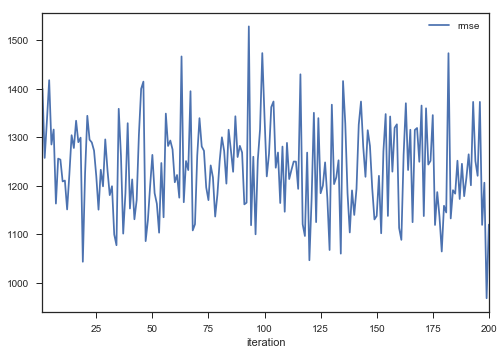

rmse    1236.468037
dtype: float64
rmse    1232.937596
dtype: float64


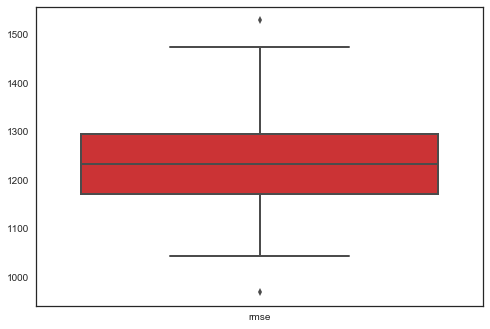

984.107255618 1481.76800154
(1, 1)


In [72]:
# 용균이 모델에 대한 평가

model_1 = [ u'KM_st', u'HP_st',
            u'Quarterly_Tax_st', u'Weight_st', u'Guarantee_Period_st',
            u'Mfg_Time_st', u'Airco', 
            u'Automatic_airco', u'CD_Player', u'Fuel_Type_CNG']

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

list_rmse = []

def model_(ratio, feature , random):
    dfx_train, dfx_test, Pricex1_train, Pricex1_test = train_test_split(df061[feature],dfprice, train_size = ratio, random_state = random)
    modelx = LinearRegression()
    modelx.fit(dfx_train, Pricex1_train)
    predict_Pricex1 = modelx.predict(dfx_test)
    x = np.sqrt(metrics.mean_squared_error(predict_Pricex1, Pricex1_test))
    list_rmse.append(x)
    # rmse
    #print (np.sqrt(metrics.mean_squared_error(predict_Price1, Price1_test)))
    # r-square
    #print (model.score(df061_test, Price1_test))
    

for i in range(1,201) :
    model_(0.8, model_1 , i)
        
list_idx = [x for x in range(1,201)]
df31 = pd.DataFrame(list_rmse, columns = ['rmse'])
df41 = pd.DataFrame(list_idx, columns = ['iteration'])
# df2 = pd.DataFrame(pd.Series(np.arange(1, 101),list_rmse))


print (df31.shape)
df41
df41 = pd.concat([df41, df31], axis=1)
df41
df41.plot(kind='line', x='iteration', y='rmse')
plt.show()

print df31.mean()
print df31.median()

with plt.style.context(('seaborn-white')):
        sns.boxplot(x=df31, linewidth=2, palette="Set1")
plt.show()

def find_outlier_num(df): #이상치 min, max 값 구하는 함수
    iqr = np.percentile(df['rmse'],75)-np.percentile(df['rmse'],25)
    outlier_min = np.percentile(df['rmse'],25) - iqr*1.5
    outlier_max = np.percentile(df['rmse'],75) + iqr*1.5
    print outlier_min, outlier_max
    over = []
    under =[]
    for i in df['rmse']:
        if i > outlier_max:
            over.append(i) 
        if i < outlier_min:
            under.append(i)
    return len(over), len(under)

print find_outlier_num(df31)

(200, 1)


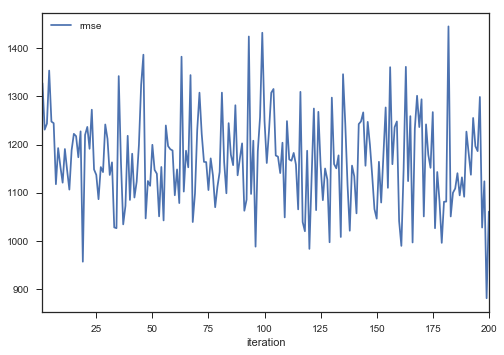

rmse    1166.605776
dtype: float64
rmse    1160.412125
dtype: float64


C:\Python27\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


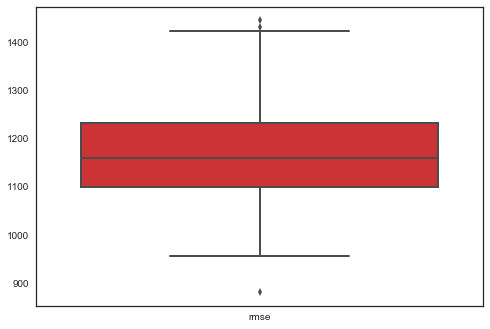

901.431140482 1429.32025087
(2, 1)


In [57]:
# 영인이 모델에 대한 평가

model_2 = [ "Mfg_Month", "Age_08_04", "BOVAG_Guarantee", "Automatic_airco", "KM", "HP", "Quarterly_Tax", \
                "Weight", "Guarantee_Period", "Powered_Windows", "Sport_Model"]

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

list_rmse = []

def model_(ratio, feature , random):
    dfx_train, dfx_test, Pricex1_train, Pricex1_test = train_test_split(df062[feature],dfprice, train_size = ratio, random_state = random)
    modelx = LinearRegression()
    modelx.fit(dfx_train, Pricex1_train)
    predict_Pricex1 = modelx.predict(dfx_test)
    x = np.sqrt(metrics.mean_squared_error(predict_Pricex1, Pricex1_test))
    list_rmse.append(x)
    # rmse
    #print (np.sqrt(metrics.mean_squared_error(predict_Price1, Price1_test)))
    # r-square
    #print (model.score(df061_test, Price1_test))
    

for i in range(1,201) :
    model_(0.8, model_2 , i)
        
list_idx = [x for x in range(1,201)]
df32 = pd.DataFrame(list_rmse, columns = ['rmse'])
df42 = pd.DataFrame(list_idx, columns = ['iteration'])
# df2 = pd.DataFrame(pd.Series(np.arange(1, 101),list_rmse))


print (df32.shape)
df42
df42 = pd.concat([df42, df32], axis=1)
df42
df42.plot(kind='line', x='iteration', y='rmse')
plt.show()

print df32.mean()
print df32.median()

with plt.style.context(('seaborn-white')):
        sns.boxplot(x=df32, linewidth=2, palette="Set1")
plt.show()

def find_outlier_num(df): #이상치 min, max 값 구하는 함수
    iqr = np.percentile(df['rmse'],75)-np.percentile(df['rmse'],25)
    outlier_min = np.percentile(df['rmse'],25) - iqr*1.5
    outlier_max = np.percentile(df['rmse'],75) + iqr*1.5
    print outlier_min, outlier_max
    over = []
    under =[]
    for i in df['rmse']:
        if i > outlier_max:
            over.append(i) 
        if i < outlier_min:
            under.append(i)
    return len(over), len(under)

print find_outlier_num(df32)

(200, 1)


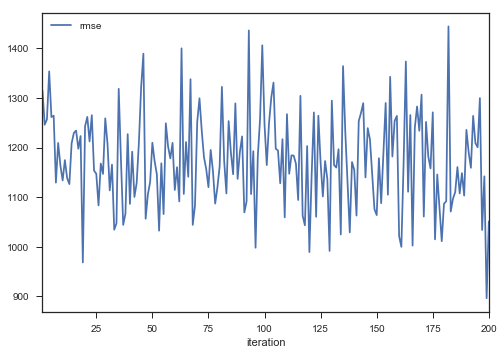

rmse    1174.259674
dtype: float64
rmse    1170.081064
dtype: float64


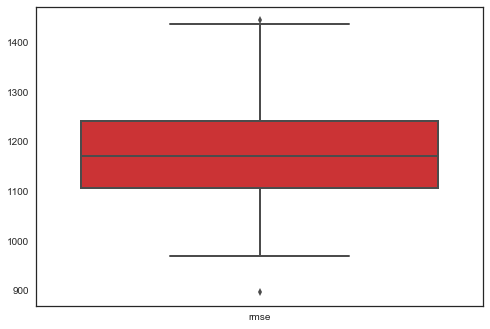

904.540974807 1442.78452316
(1, 1)


In [82]:
# 소령이 모델에 대한 평가

#model_3 = ["Mfg_Year", "Age_08_04", "Fuel_Type_CNG", "Fuel_Type_Diesel", "Fuel_Type_Petrol", "HP", "Quarterly_Tax", "Weight", "BOVAG_Guarantee", "Guarantee_Period", "Automatic_airco", "Powered_Windows","Sport_Model"]
model_3 = ['Mfg_Month','Age_08_04','KM','Automatic_airco','HP','Quarterly_Tax','Weight','Guarantee_Period','Powered_Windows','Sport_Model']

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

list_rmse = []

def model_(ratio, feature , random):
    dfx_train, dfx_test, Pricex1_train, Pricex1_test = train_test_split(df063[feature],dfprice, train_size = ratio, random_state = random)
    modelx = LinearRegression()
    modelx.fit(dfx_train, Pricex1_train)
    predict_Pricex1 = modelx.predict(dfx_test)
    x = np.sqrt(metrics.mean_squared_error(predict_Pricex1, Pricex1_test))
    list_rmse.append(x)
    # rmse
    #print (np.sqrt(metrics.mean_squared_error(predict_Price1, Price1_test)))
    # r-square
    #print (model.score(df061_test, Price1_test))
    

for i in range(1,201) :
    model_(0.8, model_3 , i)
        
list_idx = [x for x in range(1,201)]
df33 = pd.DataFrame(list_rmse, columns = ['rmse'])
df43 = pd.DataFrame(list_idx, columns = ['iteration'])
# df2 = pd.DataFrame(pd.Series(np.arange(1, 101),list_rmse))


print (df33.shape)
df43
df43 = pd.concat([df43, df33], axis=1)
df43
df43.plot(kind='line', x='iteration', y='rmse')
plt.show()

print df33.mean()
print df33.median()

with plt.style.context(('seaborn-white')):
        sns.boxplot(x=df33, linewidth=2, palette="Set1")
plt.show()

def find_outlier_num(df): #이상치 min, max 값 구하는 함수
    iqr = np.percentile(df['rmse'],75)-np.percentile(df['rmse'],25)
    outlier_min = np.percentile(df['rmse'],25) - iqr*1.5
    outlier_max = np.percentile(df['rmse'],75) + iqr*1.5
    print outlier_min, outlier_max
    over = []
    under =[]
    for i in df['rmse']:
        if i > outlier_max:
            over.append(i) 
        if i < outlier_min:
            under.append(i)
    return len(over), len(under)

print find_outlier_num(df33)

## TEST2 (Cross-Validation)

* Validation 방식을 택할 경우, test set에 할당되는 숫자(200개)만큼의 data를 이용할 수 없다는 한계가 분명히 있다. 따라서 전체 train set을 다 활용하면서도 test도 가능한 cross validation 방식으로 세 모델을 다시 검정해보고자 한다.

* 기준 cv = 20(한 블록당 약 50개)를 돌려서 가장 안정적인 score(r-square)값이 나오는 모델을 뽑는다.

* 평가기준으로 cv 20개의 평균과 표준편차를 이용한다.


In [83]:
#용균이

print scores1
print scores1.mean(), scores1.std()

[ 0.92021599  0.8264898   0.88229796  0.84103388  0.90004174  0.89871034
  0.85558751  0.9161481   0.80694459  0.89717971  0.91028202  0.82497523
  0.93037444  0.91509598  0.92456163  0.8575015   0.77014168  0.86735779
  0.83849069  0.90438723]
0.874390889834 0.0438258470895


In [84]:
#영인이

print scores2
print scores2.mean(), scores2.std()

[ 0.93368607  0.81985447  0.88810231  0.86897411  0.8981028   0.90120184
  0.86884785  0.92867308  0.836977    0.9246166   0.92322442  0.84977171
  0.92645131  0.94076968  0.92645814  0.84754578  0.78094866  0.89500516
  0.87963488  0.90444462]
0.887164524422 0.0419827255216


In [85]:
#소령이

print scores3
print scores3.mean(), scores3.std()

[ 0.9336799   0.83807075  0.88544479  0.86263575  0.89550497  0.90261487
  0.86236534  0.92564615  0.83370827  0.92215462  0.92307552  0.84453751
  0.92903566  0.93218954  0.93091212  0.84938567  0.76950266  0.89290628
  0.86922281  0.89969609]
0.885114463759 0.0425234397088


# 선택 및 총평

* TEST1(Validation)에서 200쌍 train-test set의 RMSE의 평균, 중위수, 아웃라이어 갯수 모든 항목에서 모델2(김영인)가 가장 우수했다. 

* TEST2(Cross-Validation)에서도 cv=20개의 평균과 표준편차에서 모두 모델2(김영인)가 가장 우수했다.

* 결론: 우리 조 전원은 '모델2'를 최종회귀모델로 선정했다. 김영인군에게 박수를 짝짝.

In [ ]:

# 결론 및 후기 술회

# 걸어온 발자취, 붙일만한 이미지(option)
# 회의록 정리(option)

# 아쉬웠던 점: (용균) - pipline을 먼저 세우고 달릴껄... 
#model 변수 반영을 시도했지만 결국 실패...이를 효율적으로 반영할 방법은 없었을까.
#dummy화된 color는 과연 어떤 결과를 냈을까.
#도메인 지식을 듣고, fit의 위력을 보고나서 느낀 건...오차율이 엄청 낮은 정답을 구할 수가 없겠구나,
# 내가 할게 그렇게 많지가 않구나.
#test3을 둬서 오버피팅체크(random을 고정으로 두고 배율 조정만으로...)
# R에서 사용했던 잔차분석 모두와 정규화과정도 다음에는 꼭 넣고 싶다.
